## Definition des variables

### Definition des variables d’entrée  

In [591]:
clear all;
% points de données d'entrée
X = 0:0.01:0.99;
X = X';

### Definition de modèle :  

On commence par un modèle aléatoire

In [592]:
% definition de modèle
y = cos(2*pi*X);

### Repartition des variables en entrainement et test

In [593]:

X_test = X(1:2:end);
y_test = y(1:2:end);
X_train = X(2:2:end);
y_train = y(2:2:end);
n = length(X); % nombre de points de données
n2 = length(X_train);
% size(y_train)

### Definition des parametres 

In [594]:
 % parametres initiaux
omega = ones(n2, 1);
size(omega)


ans =

    50     1



## Definition de noyau 

### Implementation de fonction de noyau

fichier noyau.m : 

In [595]:
% function noyau = noyau(x, x1, choix)
%   switch choix
%       case 1
%           % Noyau linéaire
%           c = 0.05; 
%           y = x' * x1 + c;
%       case 2
%           % Noyau polynomial
%           alpha = 1.5; % Valeur arbitraire pour alpha, vous pouvez ajuster selon vos besoins
%           c = 0.05; % Valeur arbitraire pour c, vous pouvez ajuster selon vos besoins
%           d = 1.2; % Valeur arbitraire pour d, vous pouvez ajuster selon vos besoins
%           y = (alpha * (x' * x1) + c) .^ d;
%       case 3
%           % Noyau gaussien
%           sigma = 0.2; 
%           % sigma = sqrt(var(x));
%           y = exp( -norm(x - x1) .^ 2 ./ (2 * sigma ^ 2));
%       case 4
%           % Noyau exponentiel
%           sigma = 5; 
%         %   sigma = sqrt(var(x));
%           y = exp(-norm(x - x1) ./ (2 * sigma ^ 2));
%       case 5
%           % Noyau laplacien
%           sigma = 6.7; 
%         %   sigma = sqrt(var(x));
%           y = exp(-norm(x - x1) / sigma);
%       case 6
%           % Noyau sinc
%           sigma = pi; 
%           if x == x1
%             y = 1;
%           else  
%             y = prod(sin(sigma * (x - x1)) / (x - x1));
%           end  
%       otherwise
%           error('Type de noyau non reconnu.');
%   end
%   noyau = y;
% end

### Definition de noyau linéaire

In [596]:
% choix de noyau linéaire
choix = 1;
K = zeros(n2, n2);
for i = 1:n2 
  K(i, :) = noyau(X_train, X_train(i, :), choix);
end  

## Definition du fonction

La fonction est définie comme suivant : 

$$f(\omega, x) = \sum_{i=1}^{n} \omega_i K(x, x_i)$$


In [597]:
f = @(omega) arrayfun(@(i) sum(K(i, :) * omega), 1:n2);

## Definition de function de risque empirique

La fonction de risque empirique est définit comme suivante :

$$ J (\omega, y) =  \frac{1}{n} \sum_{i = 0}^{n} \|f(\omega_i) - y_i\|^2  $$


In [598]:
J = @(omega, y) 1/n * norm(f(omega) - y);

## Definition de gradient J

Le gradient de la fonction J s’écrit comme suivant : 

$$ \nabla J(\omega) = \frac{1}{n} \times K^T (K\omega - y) $$

In [599]:
gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train);

## Utilisation d’équation normale : 
 $\omega = (K^TK)^{-1} (K^TY)$

### Sur les données d’entraînement :

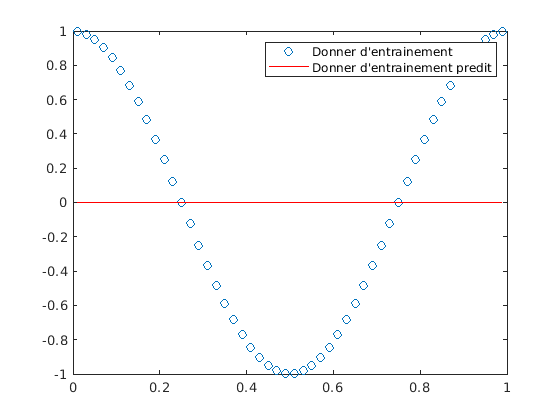

In [600]:
w_et = (K' * K) \ (K' * y_train);
y_opt = K * w_et;
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_opt, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');
hold off


## Utilisation de gradient descent : 
$ \nabla J(\omega) = \frac{1}{n} \times K^T (K\omega - y) $

In [601]:
alpha = 0.001;
num_iterations = 5000;
hist_omega = zeros(n2, num_iterations);
for i = 1:num_iterations
  omega =  omega - (alpha * gradJ(omega));
  hist_omega(:, i) = omega;
  err(i) = J(omega, y_train);
end

In [602]:
norm(gradJ(omega))


ans =

    0.0097



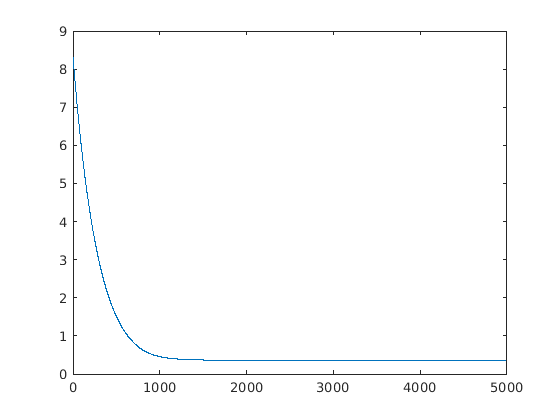

In [603]:
plot(1:i, err)

## Extraction des omega optimaux

In [604]:
min_err = find(err == min(err));
opt_omega = hist_omega(:, min_err);
J(opt_omega, y_train)


ans =

    0.3583



## Affichage de resultats

On affiche les y_train avec les y que notre model a predit

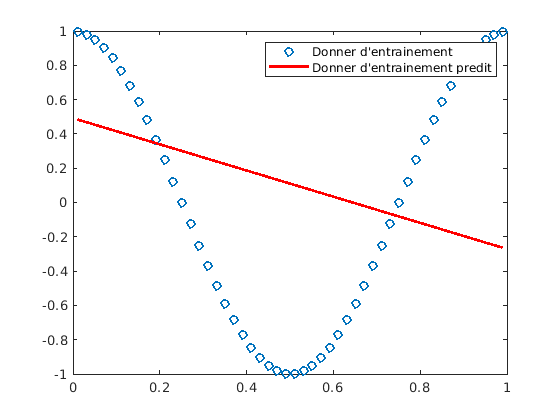

In [605]:
y_train_predit = f(opt_omega);
plot(X_train, y_train, 'o','LineWidth', 2)
hold on
plot(X_train, y_train_predit, 'r','LineWidth', 2)
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');
hold off

## Equation normal

## Sur les donnees de test

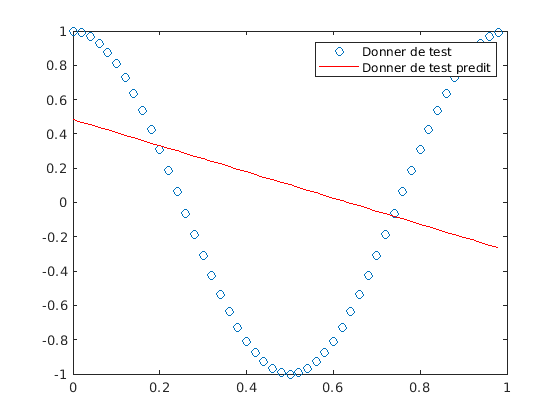

In [606]:
for i = 1:n2 
    K(:, i) = noyau(X_test, X_train(i, :), 1);
end
% y de test
y_test_predit = f(opt_omega);
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_test_predit, 'r')
legend({"Donner de test", "Donner de test predit"}, 'Location', 'northeast');
hold off

# Utilisation des autres modèles

$
(1) \quad f^*(x) = |x|, \quad x \in [-1, 1] \\
(2) \quad f^*(x) = 3\|x\|^3 - 2\|x\|^2 + 3\|x\|^2 + 3, \quad x \in [-1, 1]^3 \\
(3) \quad f^*(x) = \sin(x_1 + x_2), \quad x \in [-2, 2]^2 \\
(4) \quad f^*(x) = \frac{1}{3}(x_1 + x_2)^3 - \frac{1}{4}(x_1 + x_2)
$

# Noyeau lineaire

## Fonction 1)

In [607]:
clear all;
X = -1:0.01:0.99;
X = X';
X_train = X(1:2:end);
X_test = X(2:2:end);
y_train = modele(1, X_train);
y_test = modele(1, X_test);
n2 = length(X_train);
n = length(X);
omega = ones(n2, 1);
K = ones(n2, n2);
K_test = ones(n2, n2);
for i = 1:n2 
  K(i, :) = noyau(X_train, X_train(i, :), 1);
end
for i = 1:n2 
  K_test(i, :) = noyau(X_test, X_train(i, :), 1);
end
f = @(omega) arrayfun(@(i) sum(K(i, :) * omega), 1:n2);
J = @(omega, y) 1/n * norm(f(omega) - y);
gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train);

### Utilisation d’équation normale :  $\omega = (K^TK)^{-1} (K^TY)$

#### Sur les données d’entraînement :


Erreur de l entrainement : 2.886607e+00

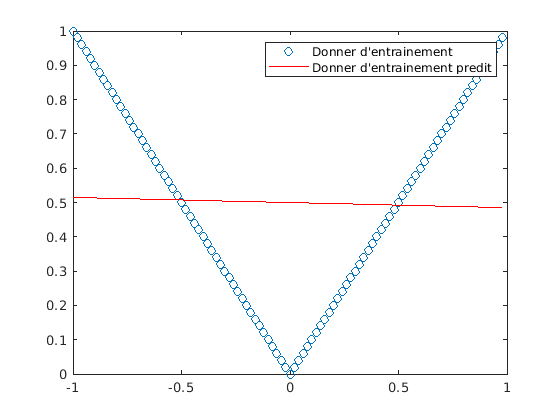

In [608]:
w_et = (K' * K) \ (K' * y_train);
y_et = K * w_et;
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_et, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');
hold off
fprintf("Erreur de l entrainement : %d", norm(y_et - y_train))

##### Sur les données de test : 

Erreur du test : 2.927581e+00

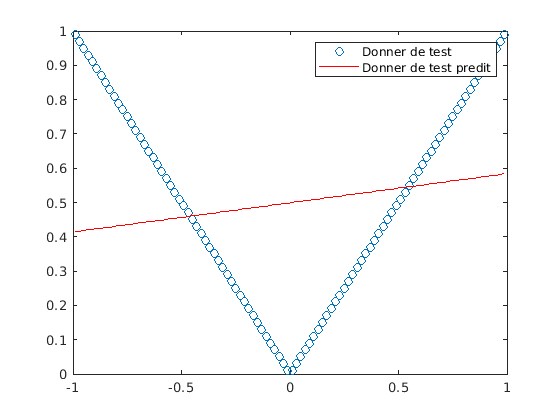

In [609]:
y_et_test = K_test * w_et;
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_et_test, 'r')
legend({"Donner de test ", "Donner de test predit"}, 'Location', 'northeast');
hold off
fprintf("Erreur du test : %d", norm(y_et_test - y_test))

### Utilisation de gradient décent : $ \nabla J(\omega) = \frac{1}{n} \times K^T (K\omega - y) $

In [610]:
alpha = 1;
num_iterations = 1000;
while (norm(gradJ(omega)) > 10e-14 && i < num_iterations) 
  grad = gradJ(omega);
  omega =  omega - (alpha * grad);
  alpha = n2 * norm(-grad) ^ 2 / (norm(K' * -grad) ^ 2 / 2);
  err(i) = J(omega, y_train);
  hist_omega(:, i) = omega;
  i = i + 1;
end
fprintf("la norme de gradient : %d\n",norm(gradJ(omega)))
fprintf("Nombre d'iteration : %d", i);

la norme de gradient : 2.868845e-16
Nombre d'iteration : 113

#### Affichage de risque empirique

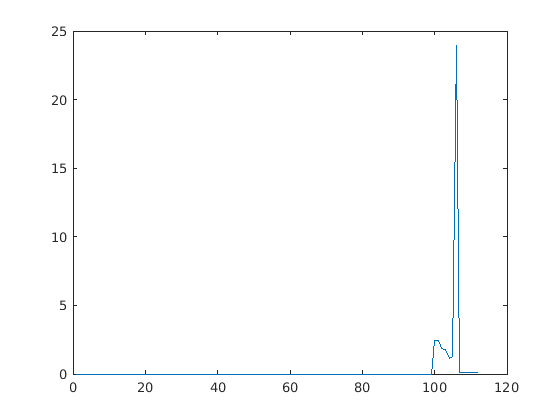

In [611]:
plot(1:i-1, err)

#### Sur les données d’entraînement :

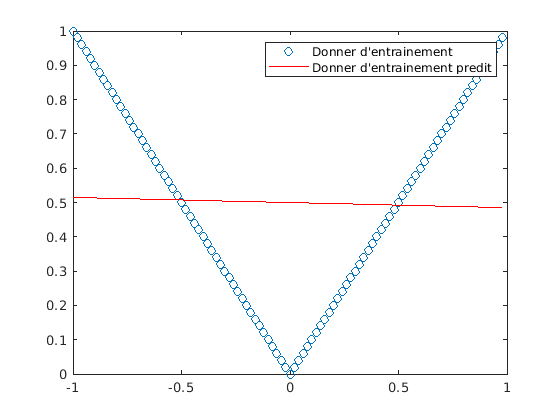

In [612]:
opt_omega = omega;
J(opt_omega, y_train);
y_predit = K * opt_omega;
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_predit, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');
hold off


#### Sur les données de test  :


err_rela =

    0.5774



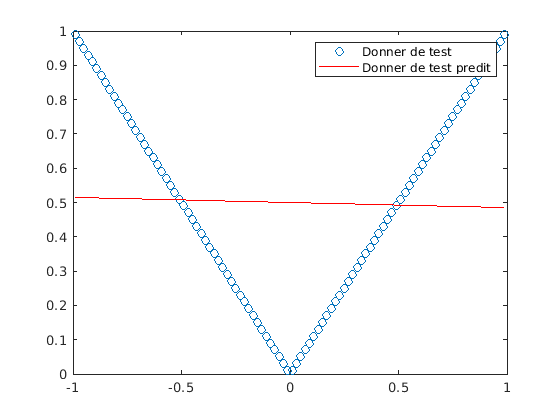

In [613]:
K2 = ones(n2, n2);
for i = 1:n2 
  % for j = 1:n2
    K2(:, i) = noyau(X_test', X_train(i, :)', 1);
  % end  
end
y_test = modele(1, X_test);
y_test_predit = K * opt_omega;
err_rela=norm(y_test-y_test_predit)/norm(y_test_predit)
fid = fopen('ErreurRelative.csv', 'w');
fprintf(fid, '%d,', err_rela);
fclose(fid);
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_test_predit, 'r')
legend({"Donner de test", "Donner de test predit"}, 'Location', 'northeast');
hold off

## Fonction 2)

In [614]:
clear all;

X1 = -1:0.01:0.99;
X2 = -0.99:0.01:1;
X3 = (X1 - X2);
X = [X1', X2', X3'];
X_train = X(1:2:end,:);
X_test = X(2:2:end,:);
y_train = modele(2, X_train);
y_test = modele(2, X_test);
n2 = length(X_train);
n = length(X);
omega = ones(n2, 1);
K = ones(n2, n2);
K_test = ones(n2, n2);
for i = 1:n2 
  K(:, i) = noyau(X_train', X_train(i, :)', 1);
end
for i = 1:n2 
  K_test(:, i) = noyau(X_test', X_train(i, :)', 1);
end
f = @(omega) arrayfun(@(i) sum(K(i, :) * omega), 1:n2);
J = @(omega, y) 1/n * norm(f(omega) - y);
gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train);

#### Utilisation d’équation normale :  $\omega = (K^TK)^{-1} (K^TY)$ 
##### Sur les données d’entraînement : 

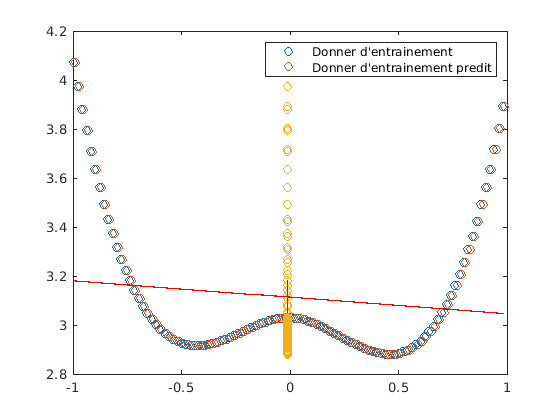

In [615]:
w_et = (K' * K) \ (K' * y_train);
y_et = f(w_et);
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_et, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');
hold off

##### Sur les données de test : 

Erreur du test : 2.808365e+00

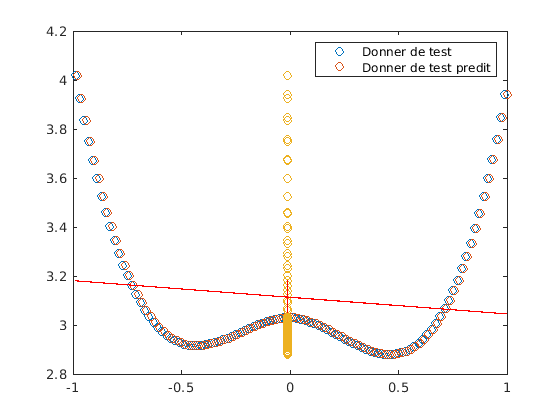

In [616]:
y_et_test = K_test * w_et;
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_et_test, 'r')
legend({"Donner de test ", "Donner de test predit"}, 'Location', 'northeast');
hold off
fprintf("Erreur du test : %d", norm(y_et_test - y_test))

### Utilisation de gradient décent : $ \nabla J(\omega) = \frac{1}{n} \times K^T (K\omega - y) $ 

In [617]:
alpha = 1;
num_iterations = 1000;
while (norm(gradJ(omega)) > 10e-14 && i < num_iterations) 
  grad = gradJ(omega);
  omega =  omega - (alpha * grad);
  alpha = n2 * norm(-grad) ^ 2 / (norm(K' * -grad) ^ 2 / 2);
  err(i) = J(omega, y_train);
  hist_omega(:, i) = omega;
  i = i + 1;
end
fprintf("la norme de gradient : %d\n",norm(gradJ(omega)))
fprintf("Nombre d'iteration : %d", i);

la norme de gradient : 4.897518e-15
Nombre d'iteration : 112

#### Affichage Risque empirique 

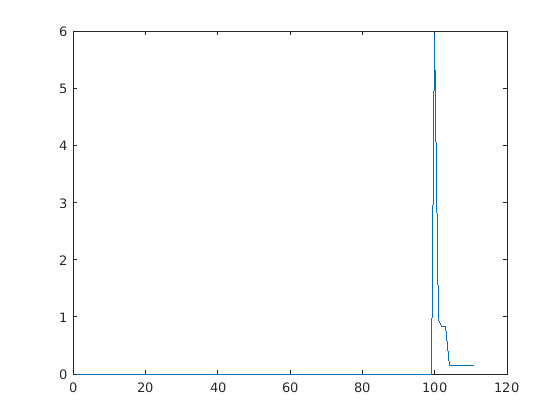

In [618]:
plot(1:i-1, err)

#### Sur les données d’entraînement : 


ans =

    0.1417



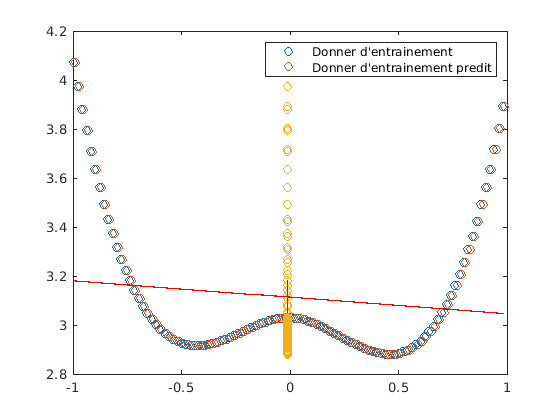

In [619]:
opt_omega = omega;
J(opt_omega, y_train)
y_predit = K * opt_omega;
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_predit, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');
hold off


#### Sur les données de test  :


err_rela =

    0.0902



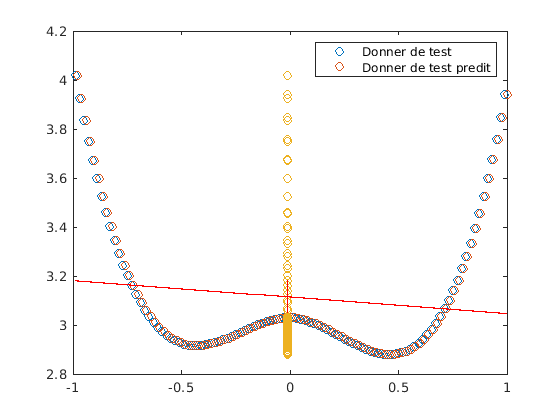

In [620]:
K2 = ones(n2, n2);
for i = 1:n2 
  % for j = 1:n2
    K2(:, i) = noyau(X_test', X_train(i, :)', 1);
  % end  
end
y_test = modele(2, X_test);

y_test_predit = K * opt_omega;
err_rela=norm(y_test-y_test_predit)/norm(y_test_predit)
fid = fopen('ErreurRelative.csv', 'a');
fprintf(fid, '%d,', err_rela);
fclose(fid);
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_test_predit, 'r')
legend({"Donner de test", "Donner de test predit"}, 'Location', 'northeast');
hold off

## Fonction 3)

In [621]:
clear all;
X1 = -2:0.02:1.99;
X2 = -1.99:0.02:2;
X = [X1', X2'];
X_train = X(1:2:end,:);
X_test = X(2:2:end,:);
y_train = modele(3, X_train);
y_test = modele(3, X_test);
n2 = length(X_train);
n = length(X);
omega = ones(n2, 1);
K = ones(n2, n2);
K_test = ones(n2, n2);
for i = 1:n2 
  K(:, i) = noyau(X_train', X_train(i, :)', 1);
end
for i = 1:n2 
  K_test(:, i) = noyau(X_test', X_train(i, :)', 1);
end
f = @(omega) arrayfun(@(i) sum(K(i, :) * omega), 1:n2);
J = @(omega, y) 1/n * norm(f(omega) - y);
gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train);

### Utilisation d’équation normale :  $\omega = (K^TK)^{-1} (K^TY)$ 
#### Sur les données d’entraînement : 



ans =

    0.3310



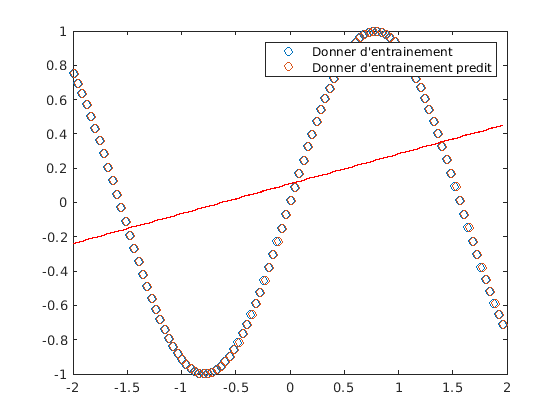

In [622]:
w_et = (K' * K) \ (K' * y_train);
y_et = f(w_et) + 0.1;
J(w_et, y_train)
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_et', 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');

hold off

#### Sur les données de test : 

Erreur du test : 6.306709e+00

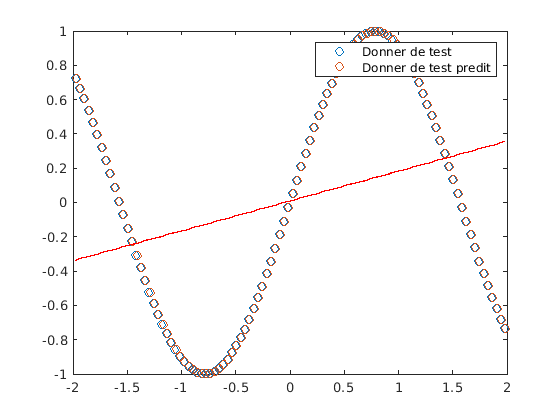

In [623]:
y_et_test = K_test * w_et;
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_et_test, 'r')
legend({"Donner de test ", "Donner de test predit"}, 'Location', 'northeast');
hold off
fprintf("Erreur du test : %d", norm(y_et_test - y_test))

### Utilisation de gradient décent : $ \nabla J(\omega) = \frac{1}{n} \times K^T (K\omega - y) $

In [624]:
alpha = 1;
num_iterations = 1000;
while (norm(gradJ(omega)) > 10e-14 && i < num_iterations) 
  grad = gradJ(omega);
  omega =  omega - (alpha * grad);
  alpha = n2 * norm(-grad) ^ 2 / (norm(K' * -grad) ^ 2 / 2);
  err(i) = J(omega, y_train);
  hist_omega(:, i) = omega;
  i = i + 1;
end
fprintf("la norme de gradient : %d\n",norm(gradJ(omega)))
fprintf("Nombre d'iteration : %d", i);

la norme de gradient : 5.433369e-14
Nombre d'iteration : 107

#### Affichage de risque empirique

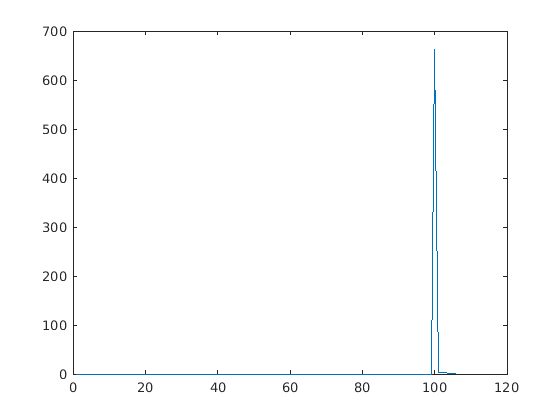

In [625]:
plot(1:i-1, err)

#### Sur les données d’entraînement :


ans =

    0.3310



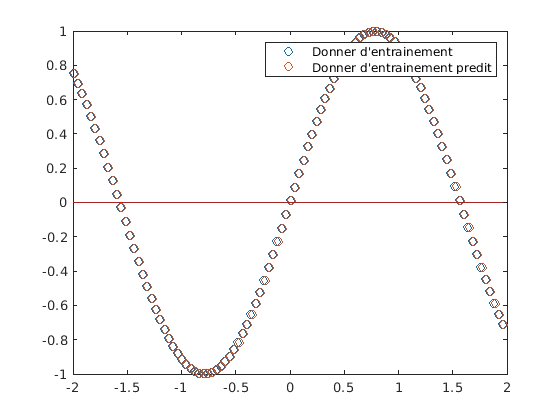

In [626]:
min_err = 0;
opt_omega = zeros(n2, 1);
min_err = find(err == min(err));
opt_omega = hist_omega(:, min_err);
J(opt_omega, y_train)
y_predit = f(opt_omega);
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_predit, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');
hold off


#### Sur les données de test  :


err_rela =

    3.1342



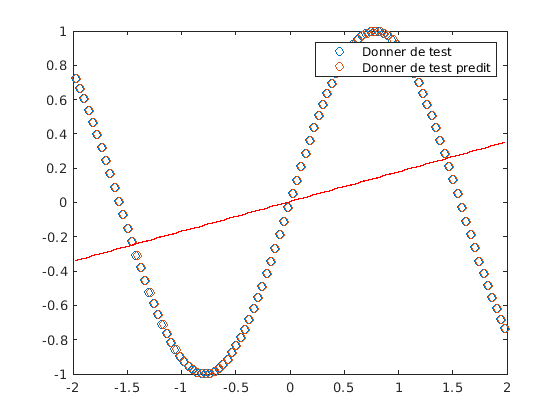

In [627]:
K2 = ones(n2, n2);
for i = 1:n2 
  % for j = 1:n2
    K2(:, i) = noyau(X_test', X_train(i, :)', 1);
  % end  
end
y_test = modele(3, X_test);

y_test_predit = K * omega;
err_rela=norm(y_test-y_test_predit)/norm(y_test_predit)
fid = fopen('ErreurRelative.csv', 'a');
fprintf(fid, '%d,', err_rela);
fclose(fid);
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_test_predit, 'r')
legend({"Donner de test", "Donner de test predit"}, 'Location', 'northeast');
hold off

## Fonction 4)

In [628]:
clear all;
X1 = -1:0.02:0.99;
X2 = -0.99:0.02:1;
X = [X1', X2'];
X_train = X(1:2:end,:);
X_test = X(2:2:end,:);
y_train = modele(4, X_train);
y_test = modele(4, X_test);
n2 = length(X_train);
n = length(X);
omega = ones(n2, 1);
K = ones(n2, n2);
K_test = ones(n2, n2);
for i = 1:n2 
  K(:, i) = noyau(X_train', X_train(i, :)', 1);
end
for i = 1:n2 
  K_test(:, i) = noyau(X_test', X_train(i, :)', 1);
end
f = @(omega) arrayfun(@(i) sum(K(i, :) * omega), 1:n2);
J = @(omega, y) 1/n * norm(f(omega) - y);
gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train);


### Utilisation d’équation normale :  $\omega = (K^TK)^{-1} (K^TY)$ 
#### Sur les données d’entraînement : 

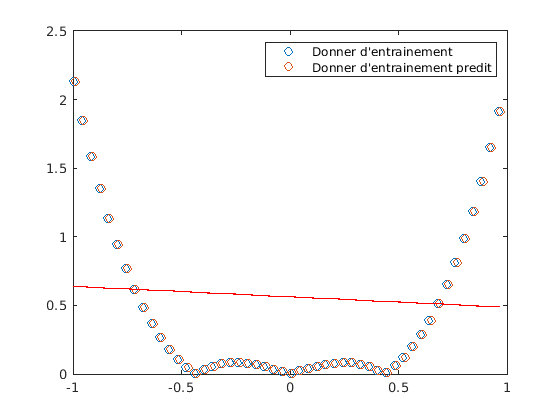

In [629]:
w_et = (K' * K) \ (K' * y_train);
y_et = f(w_et) + 0.1;
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_et, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');
hold off

#### Sur les données de test : 

Erreur du test : 4.199886e+00

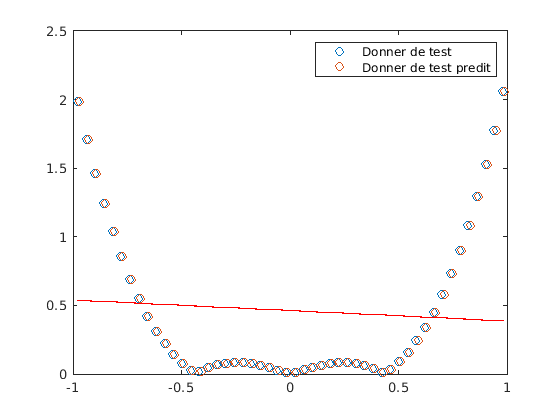

In [630]:
y_et_test = K_test * w_et;
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_et_test, 'r')
legend({"Donner de test ", "Donner de test predit"}, 'Location', 'northeast');
hold off
fprintf("Erreur du test : %d", norm(y_et_test - y_test))

### Utilisation de gradient décent : $ \nabla J(\omega) = \frac{1}{n} \times K^T (K\omega - y) $

In [631]:
alpha = 1;
num_iterations = 1000;
while (norm(gradJ(omega)) > 10e-14 && i < num_iterations) 
  grad = gradJ(omega);
  omega =  omega - (alpha * grad);
  alpha = n2 * norm(-grad) ^ 2 / (norm(K' * -grad) ^ 2 / 2);
  err(i) = J(omega, y_train);
  hist_omega(:, i) = omega;
  i = i + 1;
end
fprintf("la norme de gradient : %d\n",norm(gradJ(omega)))
fprintf("Nombre d'iteration : %d", i);

la norme de gradient : 8.956863e-15
Nombre d'iteration : 60

#### Affichage de risque empirique

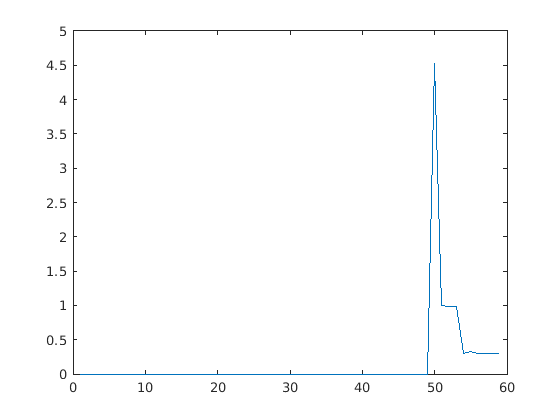

In [632]:
plot(1:i-1, err)

#### Sur les données d’entraînement :


ans =

    0.2968



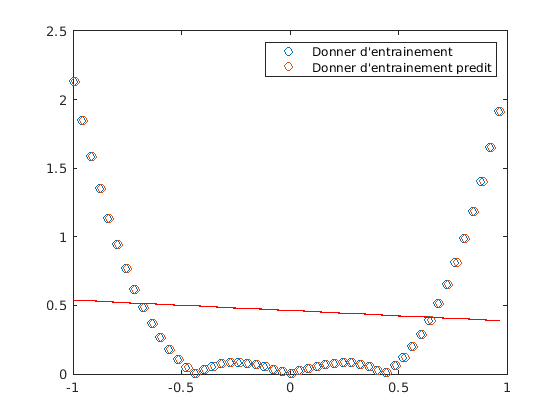

In [633]:
min_err = 0;
opt_omega = omega;
min_err = find(err == min(err));
% opt_omega = hist_omega(:, min_err);
J(opt_omega, y_train)
y_predit = f(opt_omega);
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_predit, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');

hold off


#### Sur les données de test  :


err_rela =

    1.2749



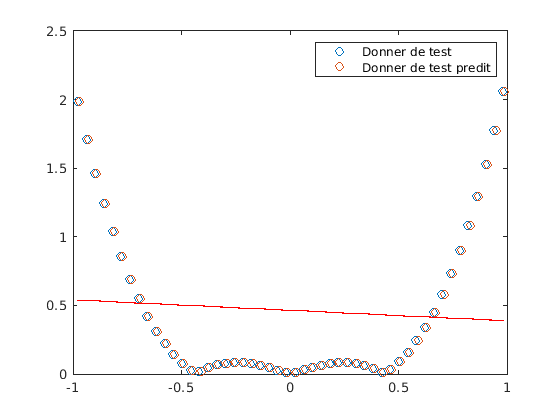

In [634]:
K2 = ones(n2, n2);
  for i = 1:n2 
    for j = 1:n2
      K2(i, j) = noyau(X_test(i, :), X_train(j, :), 3);
    end  
  end
  y_test = modele(4, X_test);

y_test_predit = K * opt_omega;
err_rela=norm(y_test-y_test_predit)/norm(y_test_predit)
fid = fopen('ErreurRelative.csv', 'a');
fprintf(fid, '%d\n', err_rela);
fclose(fid);
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_test_predit, 'r')
legend({"Donner de test", "Donner de test predit"}, 'Location', 'northeast');

hold off

# Noyau polynomial

## Fonction 1)

In [635]:
clear all;
X = -1:0.01:0.99;
X = X';
X_train = X(1:2:end);
X_test = X(2:2:end);
y_train = modele(1, X_train);
y_test = modele(1, X_test);
n2 = length(X_train);
n = length(X);
omega = ones(n2, 1);
K = ones(n2, n2);
K_test = ones(n2, n2);
for i = 1:n2 
  K(i, :) = noyau(X_train, X_train(i, :), 2);
end
for i = 1:n2 
  K_test(i, :) = noyau(X_test, X_train(i, :), 2);
end
f = @(omega) arrayfun(@(i) sum(K(i, :) * omega), 1:n2);
J = @(omega, y) 1/n * norm(f(omega) - y);
gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train);


### Utilisation d’équation normale :  $\omega = (K^TK)^{-1} (K^TY)$ 
#### Sur les données d’entraînement :

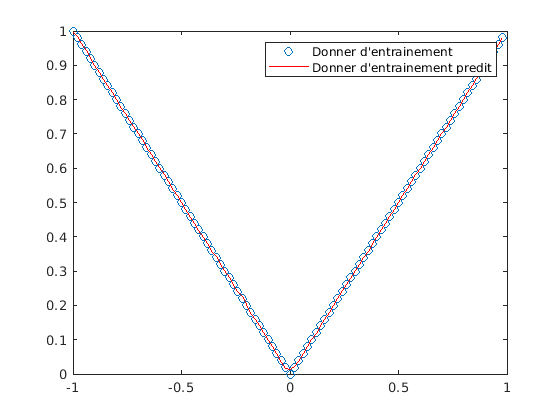

In [636]:
w_et = (K' * K) \ (K' * y_train);
y_et = f(w_et);
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_et, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');

hold off

#### Sur les données de test : 

Erreur du test : 2.091154e+00

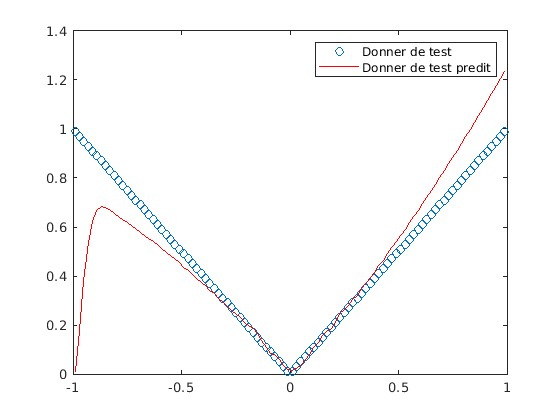

In [637]:
y_et_test = K_test * w_et;
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_et_test, 'r')
legend({"Donner de test ", "Donner de test predit"}, 'Location', 'northeast');
hold off
fprintf("Erreur du test : %d", norm(y_et_test - y_test))

### Utilisation de gradient décent : $ \nabla J(\omega) = \frac{1}{n} \times K^T (K\omega - y) $

In [638]:
alpha = 1;
num_iterations = 5000;
while (norm(gradJ(omega)) > 10e-14 && i < num_iterations) 
  grad = gradJ(omega);
  omega =  omega - (alpha * grad);
  alpha = n2 * norm(-grad) ^ 2 / (norm(K' * -grad) ^ 2 / 2);
  err(i) = J(omega, y_train);
  hist_omega(:, i) = omega;
  i = i + 1;
end
fprintf("la norme de gradient : %d\n",norm(gradJ(omega)))
fprintf("Nombre d'iteration : %d", i);

la norme de gradient : 5.150483e-01
Nombre d'iteration : 5000

#### Affichage de risque empirique

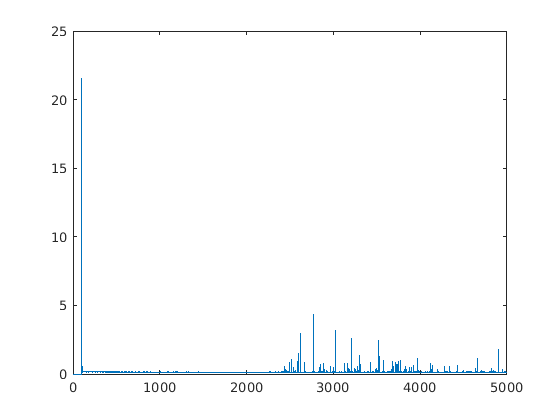

In [639]:
plot(1:i-1, err)

#### Sur les données d’entraînement :


ans =

    0.2025



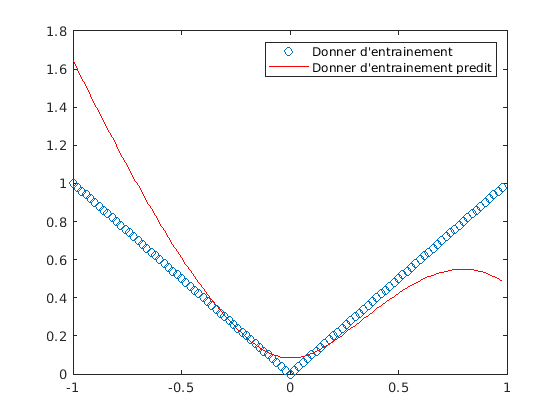

In [640]:
min_err = 0;
opt_omega = omega;
min_err = find(err == min(err));
% opt_omega = hist_omega(:, min_err);
J(opt_omega, y_train)
y_predit = K * opt_omega;
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_predit, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');

hold off


#### Sur les données de test  :


err_rela =

    0.3719



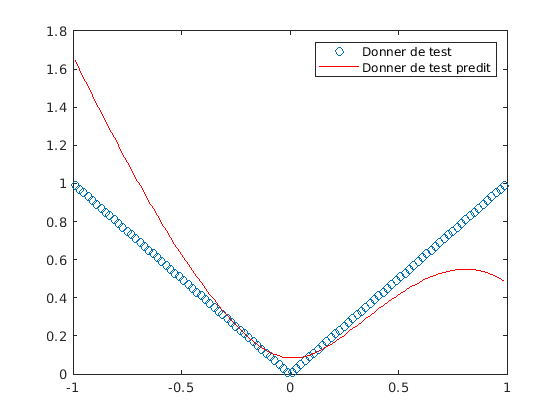

In [641]:
K2 = ones(n2, n2);
for i = 1:n2 
  % for j = 1:n2
    K2(:, i) = noyau(X_test', X_train(i, :)', 1);
  % end  
end

y_test = modele(1, X_test);
y_test_predit = K * opt_omega;
err_rela=norm(y_test-y_test_predit)/norm(y_test_predit)
fid = fopen('ErreurRelative.csv', 'a');
fprintf(fid, '%d,', err_rela);
fclose(fid);
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_test_predit, 'r')
legend({"Donner de test", "Donner de test predit"}, 'Location', 'northeast');

hold off

## Fonction 2)

In [642]:
clear all;

X1 = -1:0.01:0.99;
X2 = -0.99:0.01:1;
X3 = (X1 - X2);
X = [X1', X2', X3'];
X_train = X(1:2:end,:);
X_test = X(2:2:end,:);
y_train = modele(2, X_train);
y_test = modele(2, X_test);
n2 = length(X_train);
n = length(X);
omega = ones(n2, 1);
K = ones(n2, n2);
K_test = ones(n2, n2);
for i = 1:n2 
  K(:, i) = noyau(X_train', X_train(i, :)', 2);
end
for i = 1:n2 
  K_test(:, i) = noyau(X_test', X_train(i, :)', 2);
end
f = @(omega) arrayfun(@(i) sum(K(i, :) * omega), 1:n2);
J = @(omega, y) 1/n * norm(f(omega) - y);
gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train);

### Utilisation d’équation normale :  $\omega = (K^TK)^{-1} (K^TY)$ 
#### Sur les données d’entraînement :

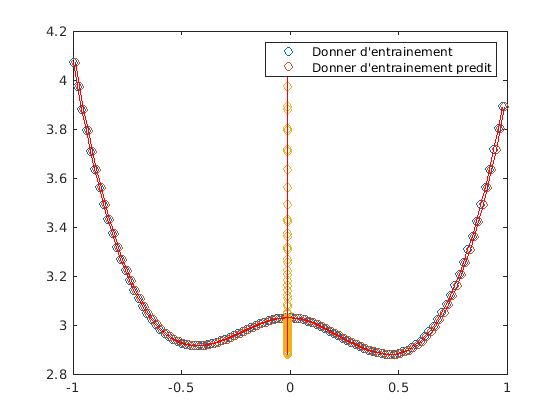

In [643]:
w_et = (K' * K) \ (K' * y_train);
y_et = f(w_et);
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_et, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');

hold off

#### Sur les données de test : 

Erreur du test : 6.276727e-03

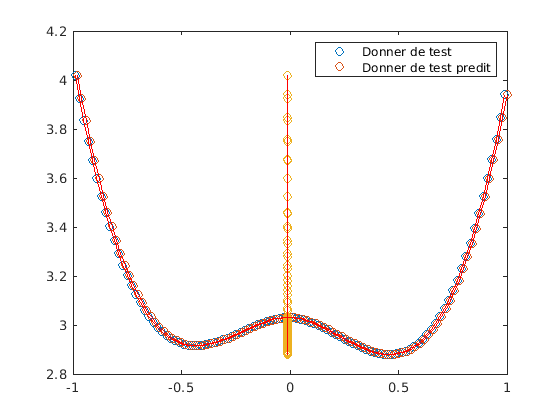

In [644]:
y_et_test = K_test * w_et;
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_et_test, 'r')
legend({"Donner de test ", "Donner de test predit"}, 'Location', 'northeast');
hold off
fprintf("Erreur du test : %d", norm(y_et_test - y_test))

### Utilisation de gradient décent : $ \nabla J(\omega) = \frac{1}{n} \times K^T (K\omega - y) $

In [645]:
alpha = 1;
num_iterations = 10000;
while (norm(gradJ(omega)) > 10e-14 && i < num_iterations) 
  grad = gradJ(omega);
  omega =  omega - (alpha * grad);
  alpha = n2 * norm(-grad) ^ 2 / (norm(K' * -grad) ^ 2 / 2);
  err(i) = J(omega, y_train);
  hist_omega(:, i) = omega;
  i = i + 1;
end
fprintf("la norme de gradient : %d\n",norm(gradJ(omega)))
fprintf("Nombre d'iteration : %d", i);

la norme de gradient : 1.067614e-02
Nombre d'iteration : 10000

##### Affichage Risque empirique  

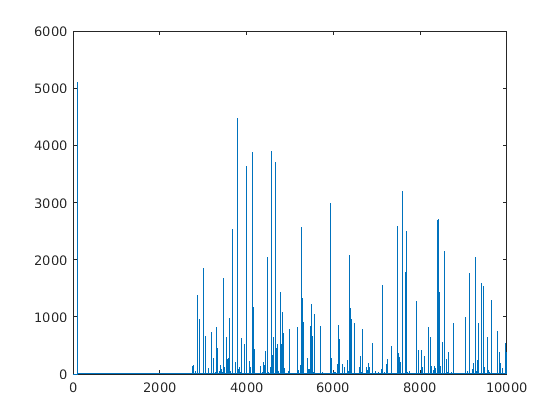

In [646]:
plot(1:i-1, err)

#### Sur les données d’entraînement : 


ans =

    0.4480



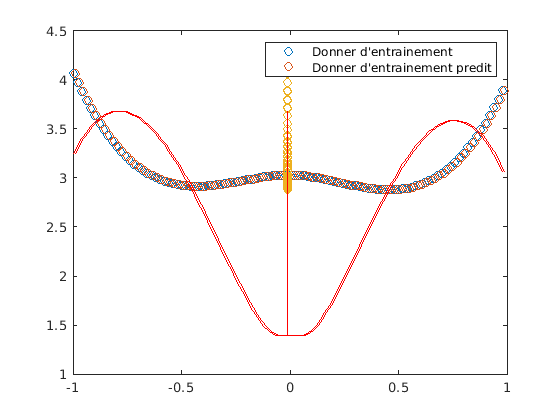

In [647]:
opt_omega = omega;
J(opt_omega, y_train)
y_predit = K * opt_omega;
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_predit, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');

hold off


#### Sur les données de test  :


err_rela =

    0.2870



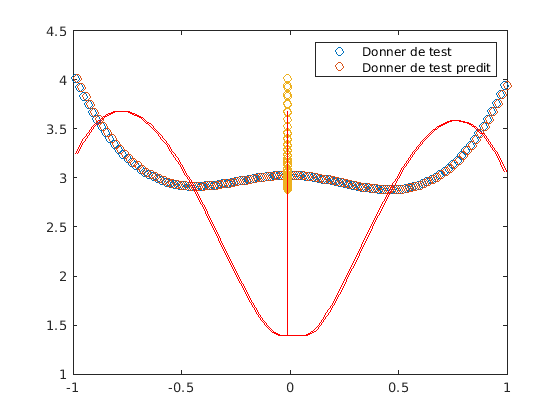

In [648]:
K2 = ones(n2, n2);
for i = 1:n2 
  % for j = 1:n2
    K2(:, i) = noyau(X_test', X_train(i, :)', 1);
  % end  
end
  y_test = modele(2, X_test);

y_test_predit = K * opt_omega;
err_rela=norm(y_test-y_test_predit)/norm(y_test_predit)
fid = fopen('ErreurRelative.csv', 'a');
fprintf(fid, '%d,', err_rela);
fclose(fid);
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_test_predit, 'r')
legend({"Donner de test", "Donner de test predit"}, 'Location', 'northeast');

hold off

## Fonction 3)

In [649]:
clear all;
X1 = -2:0.02:1.99;
X2 = -1.99:0.02:2;
X = [X1', X2'];
X_train = X(1:2:end,:);
X_test = X(2:2:end,:);
y_train = modele(3, X_train);
y_test = modele(3, X_test);
n2 = length(X_train);
n = length(X);
omega = ones(n2, 1);
K = ones(n2, n2);
K_test = ones(n2, n2);
for i = 1:n2 
  K(:, i) = noyau(X_train', X_train(i, :)', 2);
end
for i = 1:n2 
  K_test(:, i) = noyau(X_test', X_train(i, :)', 2);
end
f = @(omega) arrayfun(@(i) sum(K(i, :) * omega), 1:n2);
J = @(omega, y) 1/n * norm(f(omega) - y);
gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train);

### Utilisation d’équation normale :  $\omega = (K^TK)^{-1} (K^TY)$ 
#### Sur les données d’entraînement : 



ans =

    0.3310



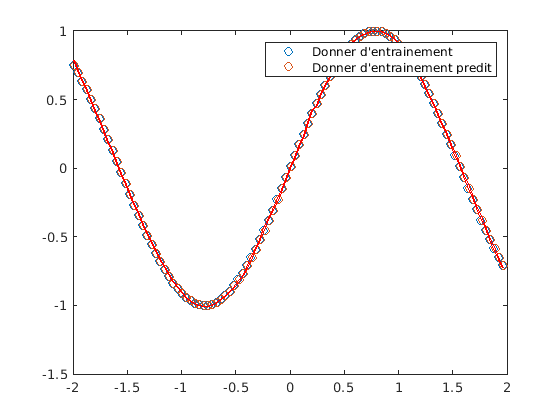

In [650]:
w_et = (K' * K) \ (K' * y_train);
y_et = f(w_et);
J(w_et, y_train)
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_et', 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');

hold off

#### Sur les données de test : 

Erreur du test : 4.712256e-01

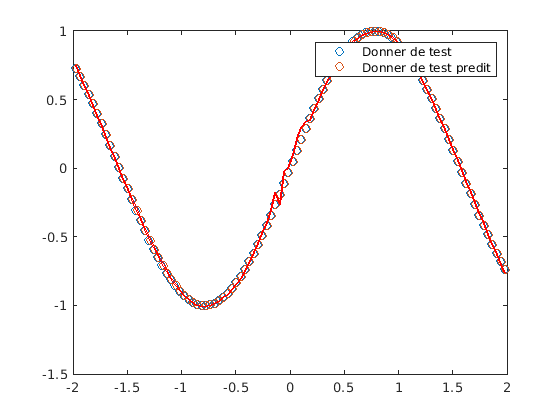

In [651]:
y_et_test = K_test * w_et;
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_et_test, 'r')
legend({"Donner de test ", "Donner de test predit"}, 'Location', 'northeast');
hold off
fprintf("Erreur du test : %d", norm(y_et_test - y_test))

### Utilisation de gradient décent : $ \nabla J(\omega) = \frac{1}{n} \times K^T (K\omega - y) $

In [652]:
alpha = 1;
num_iterations = 10000;
while (norm(gradJ(omega)) > 10e-14 && i < num_iterations) 
  grad = gradJ(omega);
  omega =  omega - (alpha * grad);
  alpha = n2 * norm(-grad) ^ 2 / (norm(K' * -grad) ^ 2 / 2);
  err(i) = J(omega, y_train);
  hist_omega(:, i) = omega;
  i = i + 1;
end
fprintf("la norme de gradient : %d\n",norm(gradJ(omega)))
fprintf("Nombre d'iteration : %d", i);

la norme de gradient : 3.636973e+01
Nombre d'iteration : 10000

#### Affichage de risque empirique

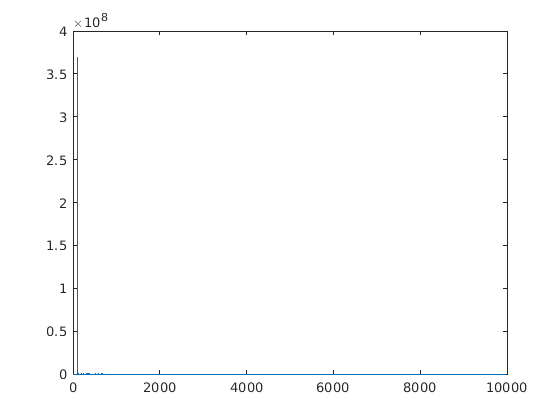

In [653]:
plot(1:i-1, err)

#### Sur les données d’entraînement :


ans =

    0.4310



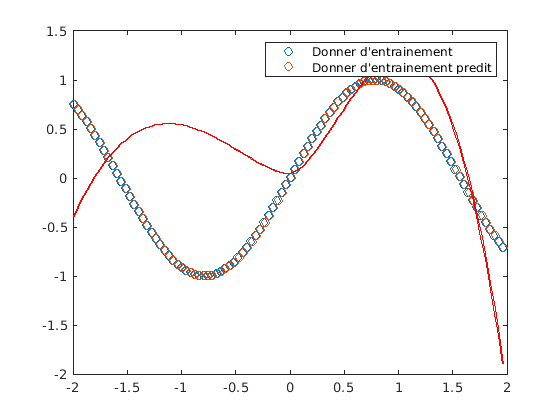

In [654]:
opt_omega = omega;
J(opt_omega, y_train)
y_predit = f(opt_omega);
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_predit, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');

hold off


#### Sur les données de test  :


err_rela =

    1.0993



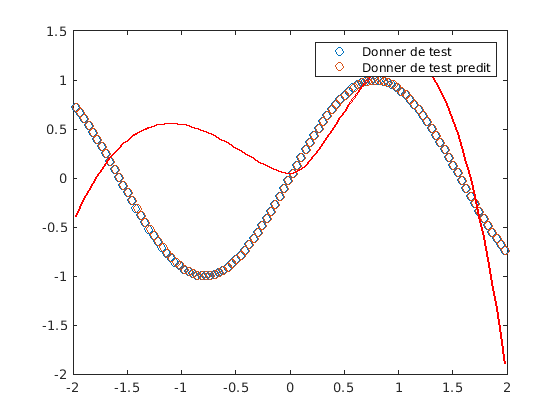

In [655]:
K2 = ones(n2, n2);
for i = 1:n2 
  % for j = 1:n2
    K2(:, i) = noyau(X_test', X_train(i, :)', 2);
  % end  
end

y_test = modele(3, X_test);
y_test_predit = K * omega;
err_rela=norm(y_test-y_test_predit)/norm(y_test_predit)
fid = fopen('ErreurRelative.csv', 'a');
fprintf(fid, '%d,', err_rela);
fclose(fid);
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_test_predit, 'r')
legend({"Donner de test", "Donner de test predit"}, 'Location', 'northeast');

hold off

## Fonction 4)

In [656]:
clear all;
X1 = -1:0.02:0.99;
X2 = -0.99:0.02:1;
X = [X1', X2'];
X_train = X(1:2:end,:);
X_test = X(2:2:end,:);
y_train = modele(4, X_train);
y_test = modele(4, X_test);
n2 = length(X_train);
n = length(X);
omega = ones(n2, 1);
K = ones(n2, n2);
K_test = ones(n2, n2);
for i = 1:n2 
  K(:, i) = noyau(X_train', X_train(i, :)', 2);
end
for i = 1:n2 
  K_test(:, i) = noyau(X_test', X_train(i, :)', 2);
end
f = @(omega) arrayfun(@(i) sum(K(i, :) * omega), 1:n2);
J = @(omega, y) 1/n * norm(f(omega) - y);
gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train);


### Utilisation d’équation normale :  $\omega = (K^TK)^{-1} (K^TY)$ 
#### Sur les données d’entraînement : 

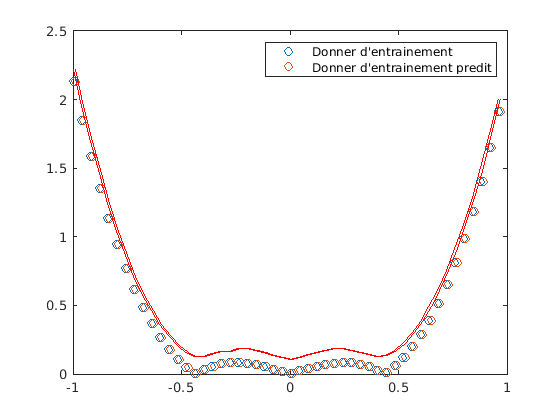

In [657]:
w_et = (K' * K) \ (K' * y_train);
y_et = f(w_et) + 0.1;
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_et, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');

hold off

#### Sur les données de test : 

Erreur du test : 7.268306e-01

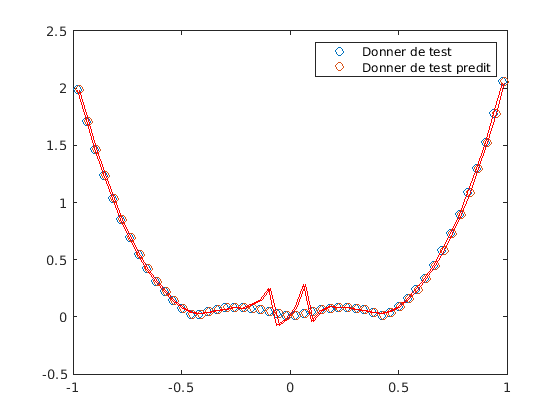

In [658]:
y_et_test = K_test * w_et;
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_et_test, 'r')
legend({"Donner de test ", "Donner de test predit"}, 'Location', 'northeast');
hold off
fprintf("Erreur du test : %d", norm(y_et_test - y_test))

### Utilisation de gradient décent : $ \nabla J(\omega) = \frac{1}{n} \times K^T (K\omega - y) $

In [659]:
alpha = 1;
num_iterations = 5000;
while (norm(gradJ(omega)) > 10e-14 && i < num_iterations) 
  grad = gradJ(omega);
  omega =  omega - (alpha * grad);
  alpha = n2 * norm(-grad) ^ 2 / (norm(K' * -grad) ^ 2 / 2);
  err(i) = J(omega, y_train);
  hist_omega(:, i) = omega;
  i = i + 1;
end
fprintf("la norme de gradient : %d\n",norm(gradJ(omega)))
fprintf("Nombre d'iteration : %d", i);

la norme de gradient : 1.220472e-03
Nombre d'iteration : 5000

#### Affichage de risque empirique

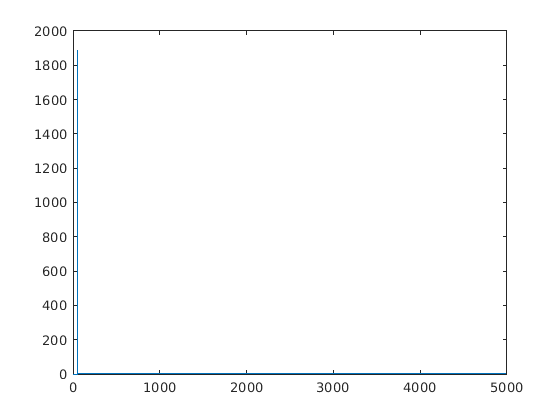

In [660]:
plot(1:i-1, err)

#### Sur les données d’entraînement :


ans =

    0.3020



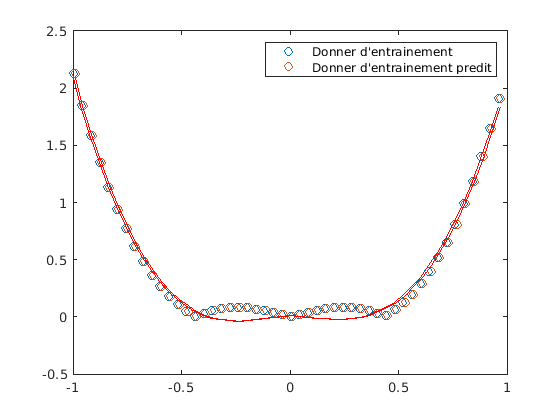

In [661]:
min_err = 0;
opt_omega = omega;
min_err = find(err == min(err));
% opt_omega = hist_omega(:, min_err);
J(opt_omega, y_train)
y_predit = f(opt_omega);
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_predit, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');

hold off


#### Sur les données de test  :


err_rela =

    0.1170



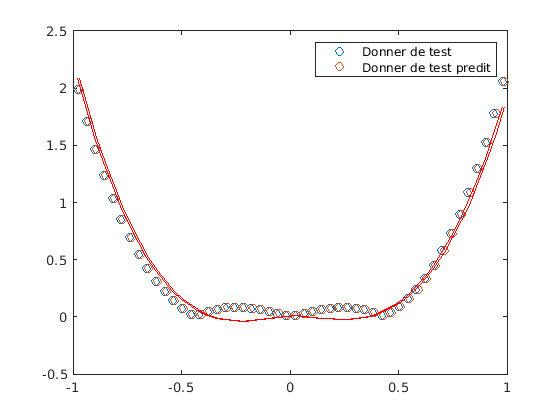

In [662]:
K2 = ones(n2, n2);
  for i = 1:n2
    for j = 1:n2
      K2(i, j) = noyau(X_test(i, :), X_train(j, :), 3);
    end  
  end
  y_test = modele(4, X_test);

y_test_predit = K * opt_omega;
err_rela=norm(y_test-y_test_predit)/norm(y_test_predit)
fid = fopen('ErreurRelative.csv', 'a');
fprintf(fid, '%d\n', err_rela);
fclose(fid);
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_test_predit, 'r')
legend({"Donner de test", "Donner de test predit"}, 'Location', 'northeast');

hold off

# Noyau Gaussien

## Fonction 1)

In [663]:
clear all;
X = -1:0.01:0.99;
X = X';
X_train = X(1:2:end);
X_test = X(2:2:end);
y_train = modele(1, X_train);
y_test = modele(1, X_test);
n2 = length(X_train);
n = length(X);
omega = ones(n2, 1);
K = ones(n2, n2);
K_test = ones(n2, n2);
for i = 1:n2
  for j = 1:n2 
    K(i, j) = noyau(X_train(i, :), X_train(j, :), 3);
  end
end
for i = 1:n2
  for j = 1:n2 
    K_test(i, j) = noyau(X_test(i, :), X_train(j, :), 3);
  end
end  
f = @(omega) arrayfun(@(i) sum(K(i, :) * omega), 1:n2);
J = @(omega, y) 1/n * norm(f(omega) - y);
gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train);


### Utilisation d’équation normale :  $\omega = (K^TK)^{-1} (K^TY)$ 
#### Sur les données d’entraînement :

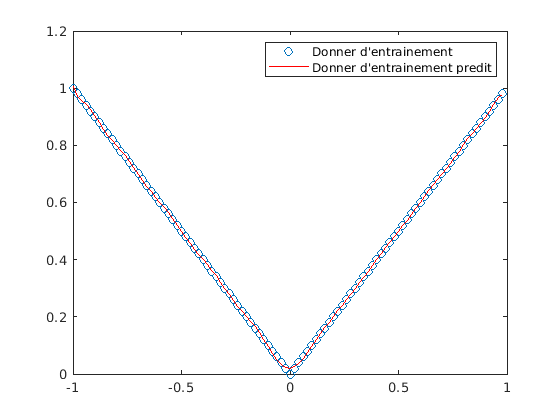

In [664]:
w_et = (K' * K) \ (K' * y_train);
y_et = f(w_et);
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_et, 'r');
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');

hold off

#### Sur les données de test : 

Erreur du test : 3.904002e-02

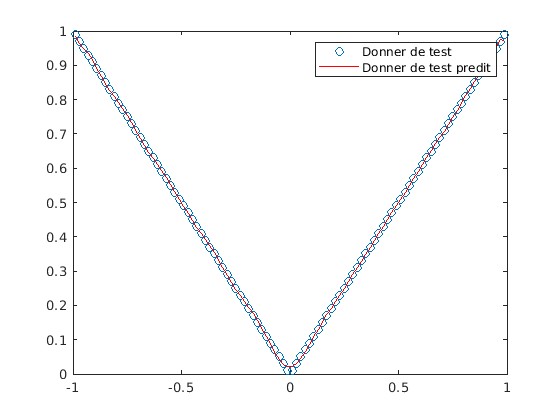

In [665]:
y_et_test = K_test * w_et;
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_et_test, 'r')
legend({"Donner de test ", "Donner de test predit"}, 'Location', 'northeast');
hold off
fprintf("Erreur du test : %d", norm(y_et_test - y_test))

### Utilisation de gradient décent : $ \nabla J(\omega) = \frac{1}{n} \times K^T (K\omega - y) $

In [666]:
alpha = 1;
num_iterations = 5000;
while (norm(gradJ(omega)) > 10e-14 && i < num_iterations) 
  grad = gradJ(omega);
  omega =  omega - (alpha * grad);
  alpha = n2 * norm(-grad) ^ 2 / (norm(K' * -grad) ^ 2 / 2);
  err(i) = J(omega, y_train);
  hist_omega(:, i) = omega;
  i = i + 1;
end
fprintf("la norme de gradient : %d\n",norm(gradJ(omega)))
fprintf("Nombre d'iteration : %d", i);

la norme de gradient : 1.480778e-03
Nombre d'iteration : 5000

#### Affichage de risque empirique

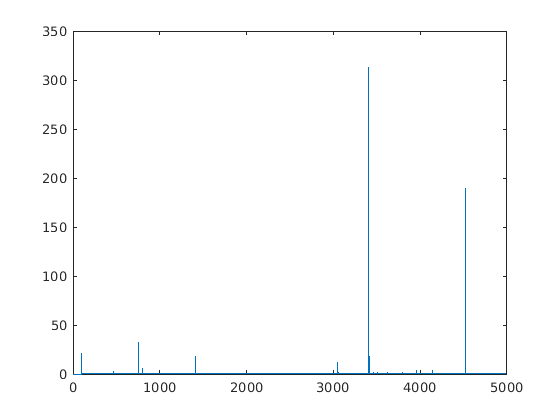

In [667]:
plot(1:i-1, err)

#### Sur les données d’entraînement :


ans =

    0.1446



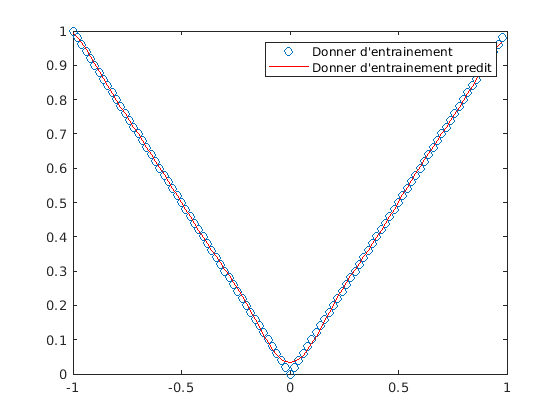

In [668]:
min_err = 0;
opt_omega = omega;
min_err = find(err == min(err));
% opt_omega = hist_omega(:, min_err);
J(opt_omega, y_train)
y_predit = K * opt_omega;
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_predit, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');

hold off


#### Sur les données de test  :


err_rela =

    0.0199



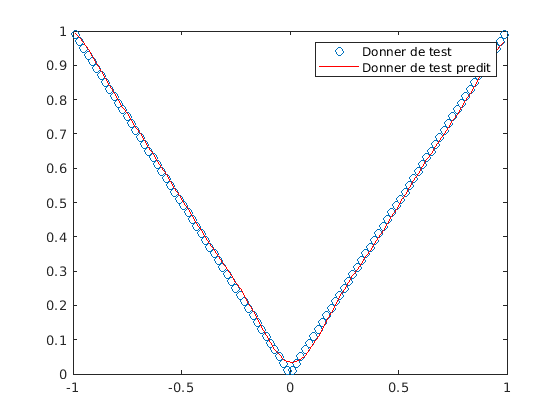

In [669]:
K2 = ones(n2, n2);
for i = 1:n2 
  for j = 1:n2
    K2(i, j) = noyau(X_test(i, :), X_train(i, :), 3);
  end  
end
  y_test = modele(1, X_test);

y_test_predit = K * opt_omega;
err_rela=norm(y_test-y_test_predit)/norm(y_test_predit)
fid = fopen('ErreurRelative.csv', 'a');
fprintf(fid, '%d,', err_rela);
fclose(fid);
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_test_predit, 'r')
legend({"Donner de test", "Donner de test predit"}, 'Location', 'northeast');

hold off

## Fonction 2)

In [670]:
clear all;
X1 = -1:0.01:0.99;
X2 = -0.99:0.01:1;
X3 = (X1 - X2);
X = [X1', X2', X3'];
X_train = X(1:2:end,:);
X_test = X(2:2:end,:);
y_train = modele(2, X_train);
y_test = modele(2, X_test);
n2 = length(X_train);
n = length(X);
omega = ones(n2, 1);
% size(omega)
K = ones(n2, n2);
K_test = ones(n2, n2);
for i = 1:n2 
  for j = 1:n2
    K(i,j) = noyau(X_train(i, :), X_train(j, :), 3);
  end  
end
for i = 1:n2 
  for j = 1:n2
    K_test(i,j) = noyau(X_test(i, :), X_train(j, :), 3);
  end  
end
f = @(omega) arrayfun(@(i) sum(K(i, :) * omega), 1:n2);
J = @(omega, y) 1/n * norm(f(omega) - y);
gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train);


### Utilisation d’équation normale :  $\omega = (K^TK)^{-1} (K^TY)$ 
#### Sur les données d’entraînement :

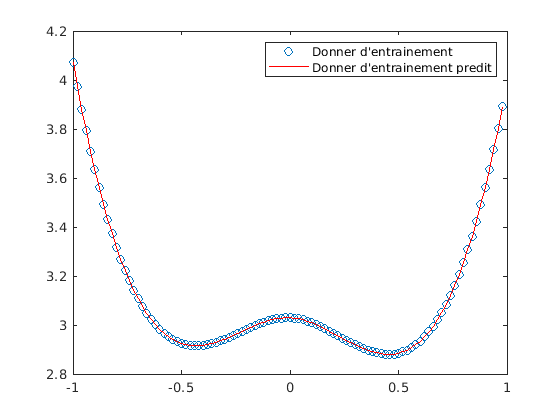

In [671]:
w_et = (K' * K) \ (K' * y_train);
y_et = f(w_et);
plot(X_train(:, 1), y_train,'o')
hold on
plot(X_train(:, 1), y_et, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');
hold off

#### Sur les données de test : 

Erreur du test : 1.665540e-04

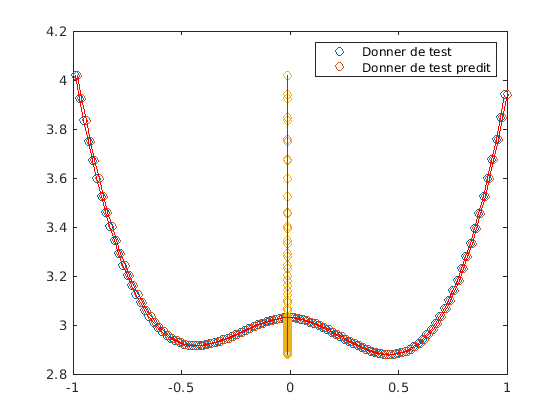

In [672]:
y_et_test = K_test * w_et;
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_et_test, 'r')
legend({"Donner de test ", "Donner de test predit"}, 'Location', 'northeast');
hold off
fprintf("Erreur du test : %d", norm(y_et_test - y_test))

### Utilisation de gradient décent : $ \nabla J(\omega) = \frac{1}{n} \times K^T (K\omega - y) $

In [673]:
alpha = 1;
num_iterations = 10000;
while (norm(gradJ(omega)) > 10e-14 && i < num_iterations) 
  grad = gradJ(omega);
  omega =  omega - (alpha * grad);
  alpha = n2 * norm(-grad) ^ 2 / (norm(K' * -grad) ^ 2 / 2);
  err(i) = J(omega, y_train);
  hist_omega(:, i) = omega;
  i = i + 1;
end
fprintf("la norme de gradient : %d\n",norm(gradJ(omega)))
fprintf("Nombre d'iteration : %d", i);

la norme de gradient : 1.835516e-06
Nombre d'iteration : 10000

##### Affichage Risque empirique  

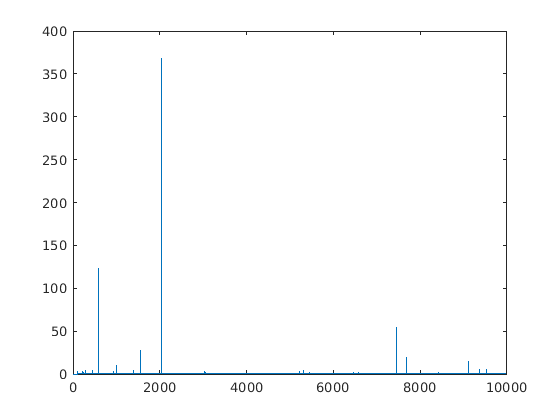

In [674]:
plot(1:i-1, err)

#### Sur les données d’entraînement : 


ans =

    0.1417



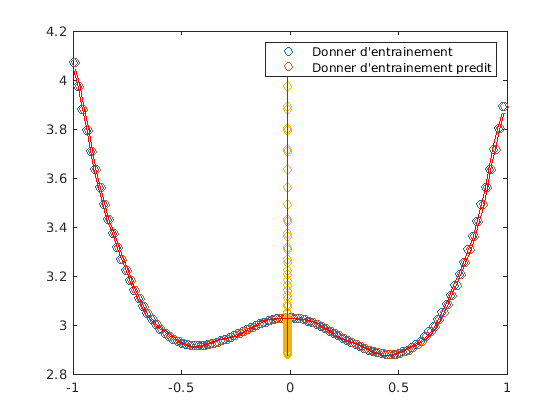

In [675]:
opt_omega = omega;
J(opt_omega, y_train)
y_predit = K * opt_omega;
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_predit, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');
hold off


#### Sur les données de test  :


err_rela =

    0.0065



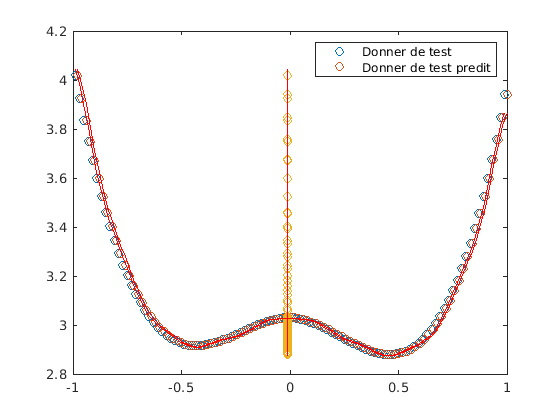

In [676]:
K2 = ones(n2, n2);
for i = 1:n2 
  % for j = 1:n2
    K2(:, i) = noyau(X_test', X_train(i, :)', 3);
  % end  
end
  y_test = modele(2, X_test);

y_test_predit = K * opt_omega;
err_rela=norm(y_test-y_test_predit)/norm(y_test_predit)
fid = fopen('ErreurRelative.csv', 'a');
fprintf(fid, '%d,', err_rela);
fclose(fid);
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_test_predit, 'r')
legend({"Donner de test", "Donner de test predit"}, 'Location', 'northeast');
hold off

## Fonction 3)

In [677]:
clear all;
X1 = -2:0.02:1.99;
X2 = -1.99:0.02:2;
X = [X1', X2'];
X_train = X(1:2:end,:);
X_test = X(2:2:end,:);
y_train = modele(3, X_train);
y_test = modele(3, X_test);
n2 = length(X_train);
n = length(X);
omega = ones(n2, 1);
K = ones(n2, n2);
K_test = ones(n2, n2);
for i = 1:n2 
  for j = 1:n2
    K(i,j) = noyau(X_train(i, :), X_train(j, :), 3);
  end  
end
for i = 1:n2 
  for j = 1:n2
    K_test(i,j) = noyau(X_test(i, :), X_train(j, :), 3);
  end  
end
f = @(omega) arrayfun(@(i) sum(K(i, :) * omega), 1:n2);
J = @(omega, y) 1/n * norm(f(omega) - y);
gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train);


### Utilisation d’équation normale :  $\omega = (K^TK)^{-1} (K^TY)$ 
#### Sur les données d’entraînement : 



ans =

    0.3310



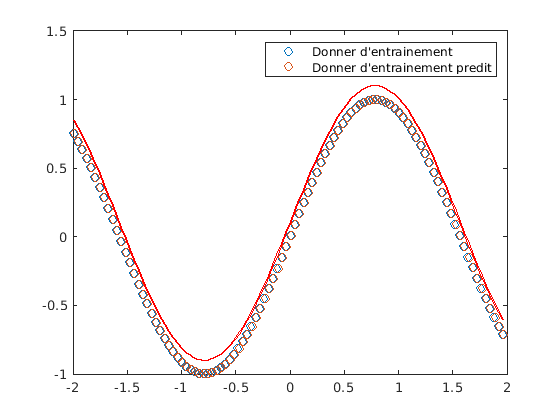

In [678]:
w_et = (K' * K) \ (K' * y_train);
y_et = f(w_et) + 0.1;
J(w_et, y_train)
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_et', 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');
hold off

#### Sur les données de test : 

Erreur du test : 5.094679e-04

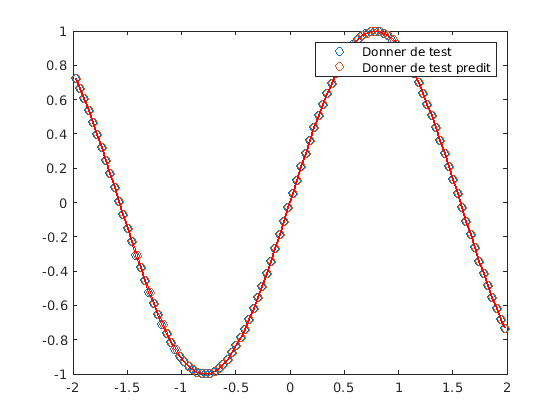

In [679]:
y_et_test = K_test * w_et;
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_et_test, 'r')
legend({"Donner de test ", "Donner de test predit"}, 'Location', 'northeast');
hold off
fprintf("Erreur du test : %d", norm(y_et_test - y_test))

### Utilisation de gradient décent : $ \nabla J(\omega) = \frac{1}{n} \times K^T (K\omega - y) $

In [680]:
alpha = 1;
num_iterations = 10000;
while (norm(gradJ(omega)) > 10e-14 && i < num_iterations) 
  grad = gradJ(omega);
  omega =  omega - (alpha * grad);
  alpha = n2 * norm(-grad) ^ 2 / (norm(K' * -grad) ^ 2 / 2);
  err(i) = J(omega, y_train);
  hist_omega(:, i) = omega;
  i = i + 1;
end
fprintf("la norme de gradient : %d\n",norm(gradJ(omega)))
fprintf("Nombre d'iteration : %d", i);

la norme de gradient : 6.996605e-08
Nombre d'iteration : 10000

#### Affichage de risque empirique

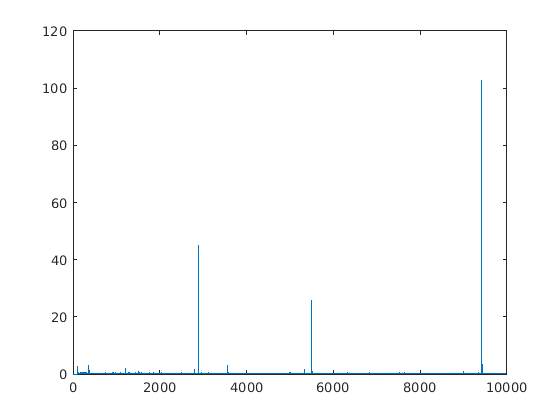

In [681]:
plot(1:i-1, err)

#### Sur les données d’entraînement :


ans =

    0.3310



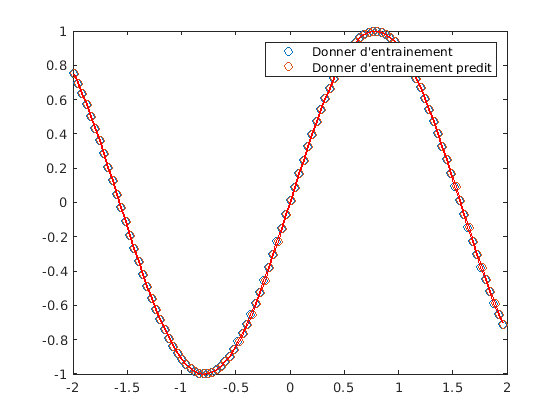

In [682]:
opt_omega = omega;
J(opt_omega, y_train)
y_predit = f(opt_omega);
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_predit, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');
hold off


#### Sur les données de test  :


err_rela =

    0.0453



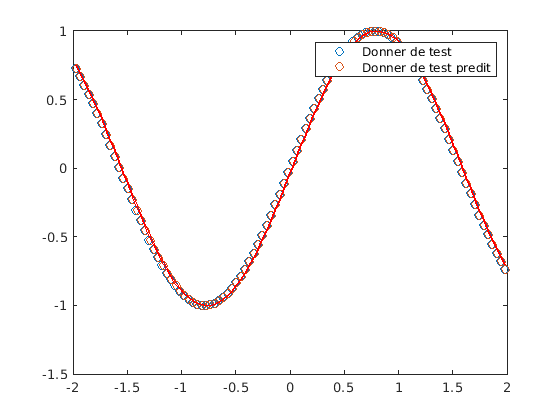

In [683]:
K2 = ones(n2, n2);
for i = 1:n2 
  for j = 1:n2
    K2(i, j) = noyau(X_test(i, :), X_train(j, :), 3);
  end  
end

y_test = modele(3, X_test);
y_test_predit = K * omega;
err_rela=norm(y_test-y_test_predit)/norm(y_test_predit)
fid = fopen('ErreurRelative.csv', 'a');
fprintf(fid, '%d,', err_rela);
fclose(fid);
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_test_predit, 'r')
legend({"Donner de test", "Donner de test predit"}, 'Location', 'northeast');

hold off

## Fonction 4)

In [684]:
clear all;
X1 = -1:0.02:0.99;
X2 = -0.99:0.02:1;
X = [X1', X2'];
X_train = X(1:2:end,:);
X_test = X(2:2:end,:);
y_train = modele(4, X_train);
y_test = modele(4, X_test);
n2 = length(X_train);
n = length(X);
omega = ones(n2, 1);
K = ones(n2, n2);
K_test = ones(n2, n2);
for i = 1:n2 
  for j = 1:n2
    K(i,j) = noyau(X_train(i, :), X_train(j, :), 3);
  end  
end
for i = 1:n2 
  for j = 1:n2
    K_test(i,j) = noyau(X_test(i, :), X_train(j, :), 3);
  end  
end
f = @(omega) arrayfun(@(i) sum(K(i, :) * omega), 1:n2);
J = @(omega, y) 1/n * norm(f(omega) - y);
gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train);

### Utilisation d’équation normale :  $\omega = (K^TK)^{-1} (K^TY)$ 
#### Sur les données d’entraînement : 

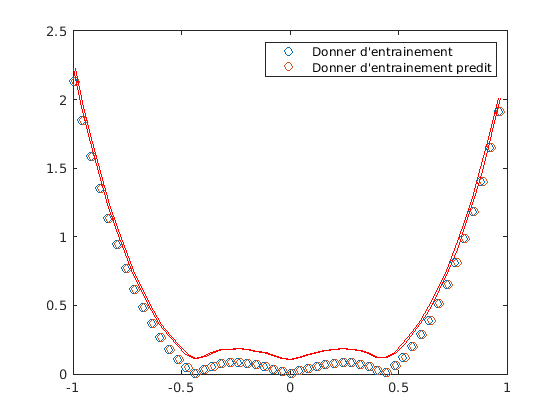

In [685]:
w_et = (K' * K) \ (K' * y_train);
y_et = f(w_et) + 0.1;
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_et, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');
hold off

#### Sur les données de test : 

Erreur du test : 1.621604e-02

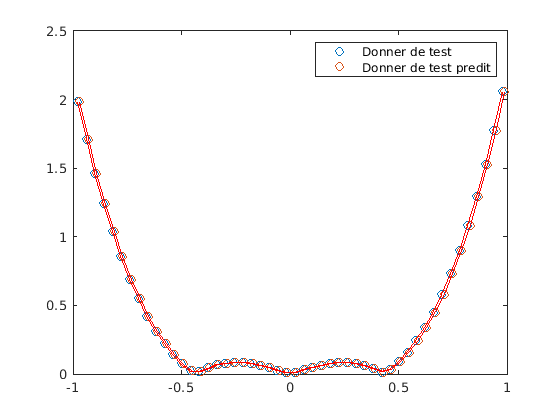

In [686]:
y_et_test = K_test * w_et;
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_et_test, 'r')
legend({"Donner de test ", "Donner de test predit"}, 'Location', 'northeast');
hold off
fprintf("Erreur du test : %d", norm(y_et_test - y_test))

### Utilisation de gradient décent : $ \nabla J(\omega) = \frac{1}{n} \times K^T (K\omega - y) $

In [687]:
alpha = 1;
num_iterations = 10000;
while (norm(gradJ(omega)) > 10e-14 && i < num_iterations) 
  grad = gradJ(omega);
  omega =  omega - (alpha * grad);
  alpha = n2 * norm(-grad) ^ 2 / (norm(K' * -grad) ^ 2 / 2);
  err(i) = J(omega, y_train);
  hist_omega(:, i) = omega;
  i = i + 1;
end
fprintf("la norme de gradient : %d\n",norm(gradJ(omega)))
fprintf("Nombre d'iteration : %d", i);

la norme de gradient : 5.177890e-07
Nombre d'iteration : 10000

#### Affichage de risque empirique

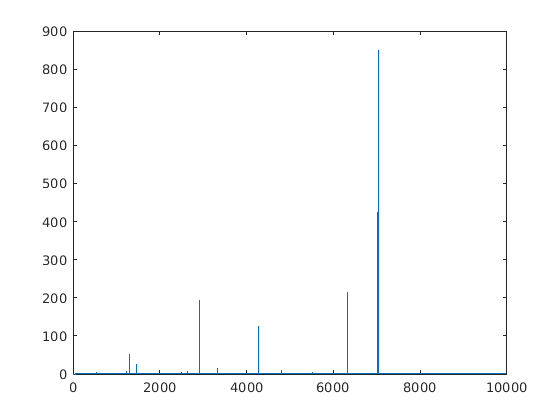

In [688]:
plot(1:i-1, err)

#### Sur les données d’entraînement :


ans =

    0.2968



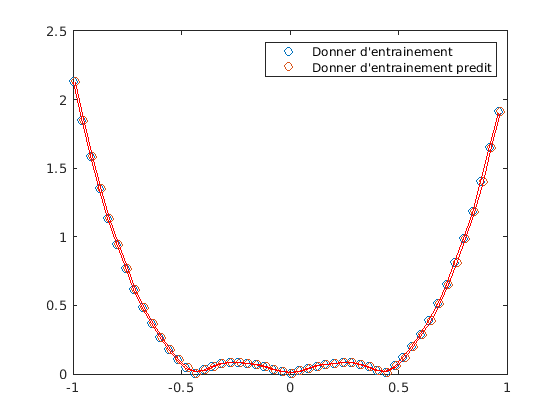

In [689]:
min_err = 0;
opt_omega = omega;
min_err = find(err == min(err));
% opt_omega = hist_omega(:, min_err);
J(opt_omega, y_train)
y_predit = f(opt_omega);
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_predit, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');
hold off


#### Sur les données de test  :


err_rela =

    0.0856



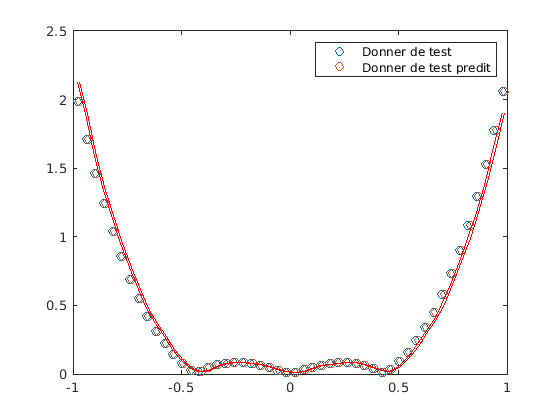

In [690]:
K2 = ones(n2, n2);
  for i = 1:n2
    for j = 1:n2
      K2(i, j) = noyau(X_test(i, :), X_train(j, :), 3);
    end  
  end
  y_test = modele(4, X_test);

y_test_predit = K * opt_omega;
err_rela=norm(y_test-y_test_predit)/norm(y_test_predit)
fid = fopen('ErreurRelative.csv', 'a');
fprintf(fid, '%d\n', err_rela);
fclose(fid);
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_test_predit, 'r')
legend({"Donner de test", "Donner de test predit"}, 'Location', 'northeast');

hold off

# Noyau Exponentiel

## Fonction 1)

In [691]:
clear all;
X = -1:0.01:0.99;
X = X';
X_train = X(1:2:end);
X_test = X(2:2:end);
y_train = modele(1, X_train);
y_test = modele(1, X_test);
n2 = length(X_train);
n = length(X);
omega = ones(n2, 1);
K = ones(n2, n2);
K_test = ones(n2, n2);
for i = 1:n2
  for j = 1:n2 
    K(i, j) = noyau(X_train(i, :), X_train(j, :), 4);
  end
end
for i = 1:n2
  for j = 1:n2 
    K_test(i, j) = noyau(X_test(i, :), X_train(j, :), 4);
  end
end  
f = @(omega) arrayfun(@(i) sum(K(i, :) * omega), 1:n2);
J = @(omega, y) 1/n * norm(f(omega) - y);
gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train);


### Utilisation d’équation normale :  $\omega = (K^TK)^{-1} (K^TY)$ 
#### Sur les données d’entraînement :

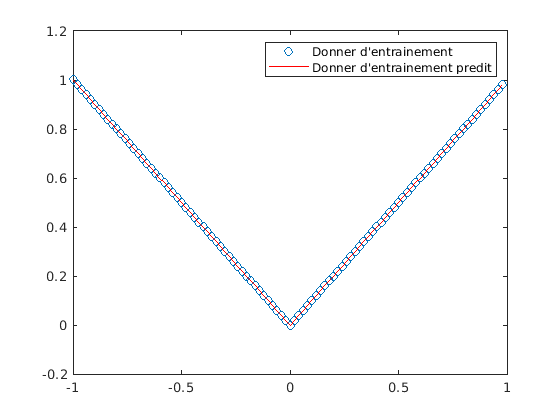

In [692]:
w_et = (K' * K) \ (K' * y_train);
y_et = f(w_et);
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_et, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');

hold off

#### Sur les données de test : 

Erreur du test : 1.019597e-02

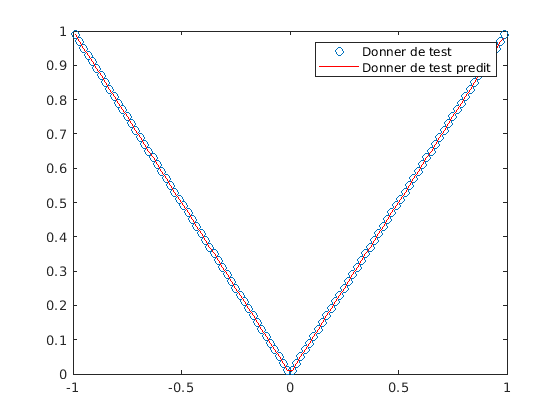

In [693]:
y_et_test = K_test * w_et;
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_et_test, 'r')
legend({"Donner de test ", "Donner de test predit"}, 'Location', 'northeast');
hold off
fprintf("Erreur du test : %d", norm(y_et_test - y_test))

### Utilisation de gradient décent : $ \nabla J(\omega) = \frac{1}{n} \times K^T (K\omega - y) $

In [694]:
alpha = 1;
num_iterations = 5000;
while (norm(gradJ(omega)) > 10e-14 && i < num_iterations) 
  grad = gradJ(omega);
  omega =  omega - (alpha * grad);
  alpha = n2 * norm(-grad) ^ 2 / (norm(K' * -grad) ^ 2 / 2);
  err(i) = J(omega, y_train);
  hist_omega(:, i) = omega;
  i = i + 1;
end
fprintf("la norme de gradient : %d\n",norm(gradJ(omega)))
fprintf("Nombre d'iteration : %d", i);

la norme de gradient : 1.519316e+00
Nombre d'iteration : 5000

#### Affichage de risque empirique

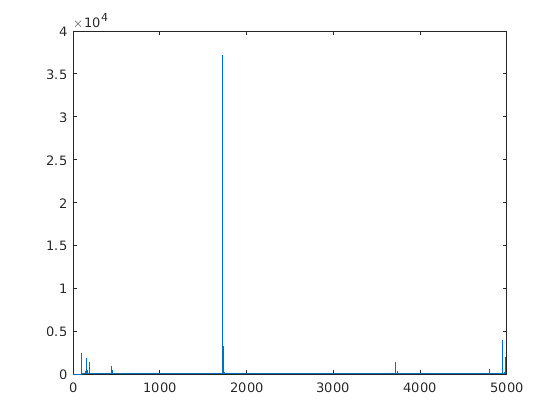

In [695]:
plot(1:i-1, err)

#### Sur les données d’entraînement :


ans =

    0.2404



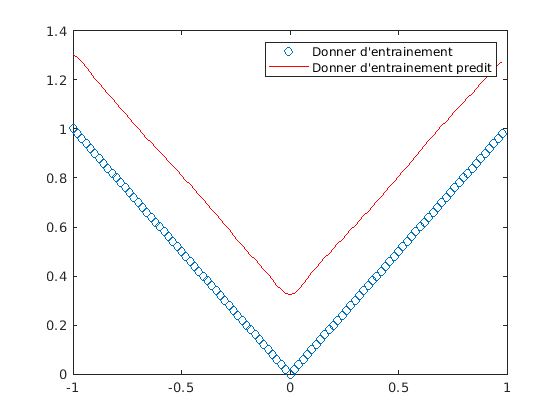

In [696]:
opt_omega = omega;
J(opt_omega, y_train)
y_predit = K * opt_omega;
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_predit, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');

hold off


#### Sur les données de test  :


err_rela =

    0.3592



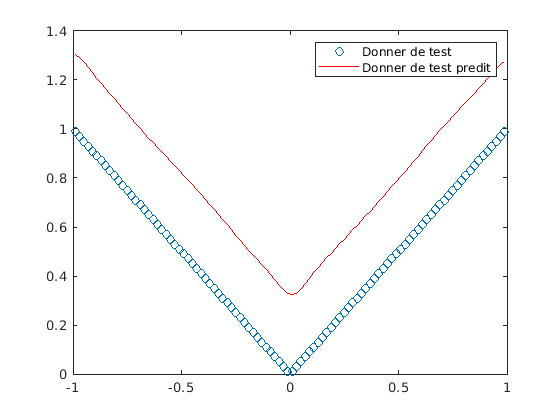

In [697]:
K2 = ones(n2, n2);
for i = 1:n2 
  for j = 1:n2
    K2(i, j) = noyau(X_test(i, :), X_train(j, :), 4);
  end  
end
  y_test = modele(1, X_test);

y_test_predit = K * opt_omega;
err_rela=norm(y_test-y_test_predit)/norm(y_test_predit)
fid = fopen('ErreurRelative.csv', 'a');
fprintf(fid, '%d,', err_rela);
fclose(fid);
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_test_predit, 'r')
legend({"Donner de test", "Donner de test predit"}, 'Location', 'northeast');

hold off

## Fonction 2)

In [698]:
clear all;
X1 = -1:0.01:0.99;
X2 = -0.99:0.01:1;
X3 = (X1 - X2);
X = [X1', X2', X3'];
X_train = X(1:2:end,:);
X_test = X(2:2:end,:);
y_train = modele(2, X_train);
y_test = modele(2, X_test);
n2 = length(X_train);
n = length(X);
omega = ones(n2, 1);
% size(omega)
K = ones(n2, n2);
K_test = ones(n2, n2);
for i = 1:n2 
  for j = 1:n2
    K(i,j) = noyau(X_train(i, :), X_train(j, :), 4);
  end  
end
for i = 1:n2 
  for j = 1:n2
    K_test(i,j) = noyau(X_test(i, :), X_train(j, :), 4);
  end  
end
f = @(omega) arrayfun(@(i) sum(K(i, :) * omega), 1:n2);
J = @(omega, y) 1/n * norm(f(omega) - y);
gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train);


### Utilisation d’équation normale :  $\omega = (K^TK)^{-1} (K^TY)$ 
#### Sur les données d’entraînement :

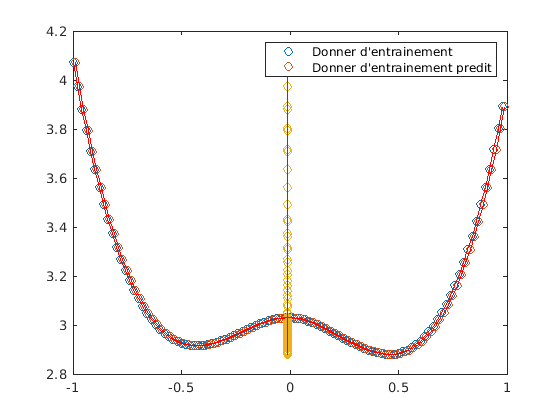

In [699]:
w_et = (K' * K) \ (K' * y_train);
y_et = f(w_et);
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_et, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');

hold off

#### Sur les données de test : 

Erreur du test : 4.875056e-02

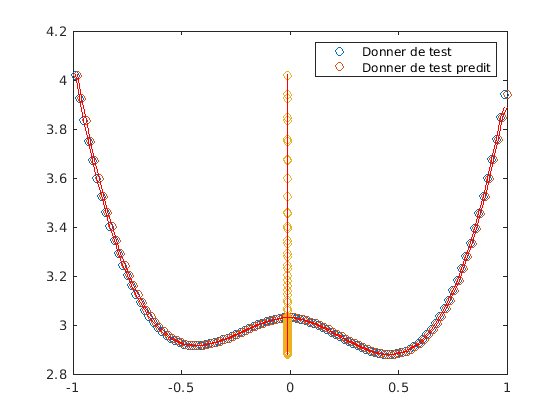

In [700]:
y_et_test = K_test * w_et;
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_et_test, 'r')
legend({"Donner de test ", "Donner de test predit"}, 'Location', 'northeast');
hold off
fprintf("Erreur du test : %d", norm(y_et_test - y_test))

### Utilisation de gradient décent : $ \nabla J(\omega) = \frac{1}{n} \times K^T (K\omega - y) $

In [701]:
alpha = 1;
num_iterations = 10000;
while (norm(gradJ(omega)) > 10e-14 && i < num_iterations) 
  grad = gradJ(omega);
  omega =  omega - (alpha * grad);
  alpha = n2 * norm(-grad) ^ 2 / (norm(K' * -grad) ^ 2 / 2);
  err(i) = J(omega, y_train);
  hist_omega(:, i) = omega;
  i = i + 1;
end
fprintf("la norme de gradient : %d\n",norm(gradJ(omega)))
fprintf("Nombre d'iteration : %d", i);

la norme de gradient : 9.440592e-07
Nombre d'iteration : 10000

##### Affichage Risque empirique  

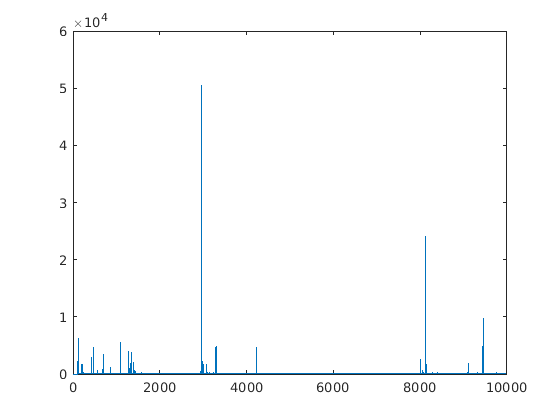

In [702]:
plot(1:i-1, err)

#### Sur les données d’entraînement : 


ans =

    0.1417



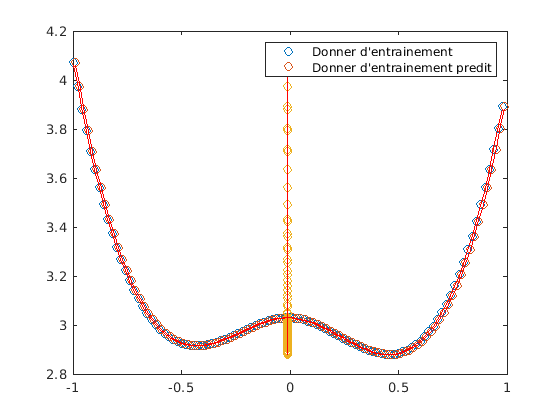

In [703]:
opt_omega = omega;
J(opt_omega, y_train)
y_predit = K * opt_omega;
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_predit, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');
hold off

#### Sur les données de test  :


err_rela =

    0.0061



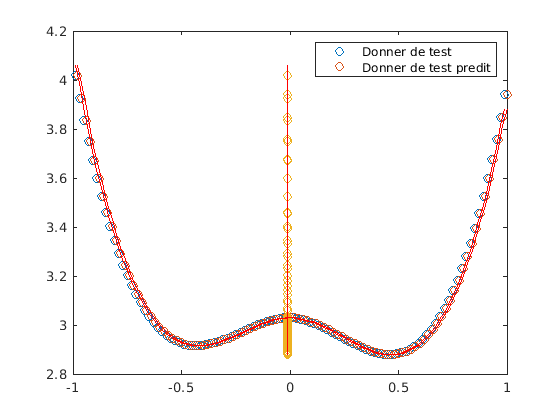

In [704]:
K2 = ones(n2, n2);
for i = 1:n2 
  for j = 1:n2
    K2(i, j) = noyau(X_test(i, :), X_train(j, :), 4);
  end  
end
  y_test = modele(2, X_test);

y_test_predit = K * opt_omega;
err_rela=norm(y_test-y_test_predit)/norm(y_test_predit)
fid = fopen('ErreurRelative.csv', 'a');
fprintf(fid, '%d,', err_rela);
fclose(fid);
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_test_predit, 'r')
legend({"Donner de test", "Donner de test predit"}, 'Location', 'northeast');

hold off

## Fonction 3)

In [705]:
clear all;
X1 = -2:0.02:1.99;
X2 = -1.99:0.02:2;
X = [X1', X2'];
X_train = X(1:2:end,:);
X_test = X(2:2:end,:);
y_train = modele(3, X_train);
y_test = modele(3, X_test);
n2 = length(X_train);
n = length(X);
omega = ones(n2, 1);
K = ones(n2, n2);
K_test = ones(n2, n2);
for i = 1:n2 
  for j = 1:n2
    K(i,j) = noyau(X_train(i, :), X_train(j, :), 4);
  end  
end
for i = 1:n2 
  for j = 1:n2
    K_test(i,j) = noyau(X_test(i, :), X_train(j, :), 4);
  end  
end
f = @(omega) arrayfun(@(i) sum(K(i, :) * omega), 1:n2);
J = @(omega, y) 1/n * norm(f(omega) - y);
gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train);


### Utilisation d’équation normale :  $\omega = (K^TK)^{-1} (K^TY)$ 
#### Sur les données d’entraînement : 


ans =

    0.3310



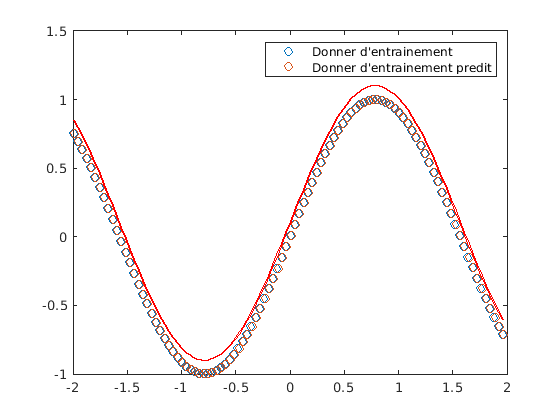

In [706]:
w_et = (K' * K) \ (K' * y_train);
y_et = f(w_et) + 0.1;
J(w_et, y_train)
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_et', 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');

hold off

#### Sur les données de test : 

Erreur du test : 2.851513e-02

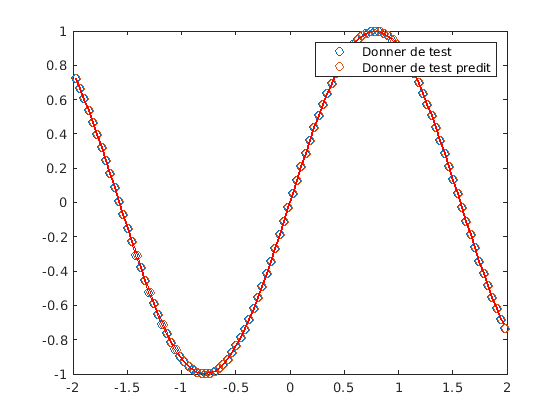

In [707]:
y_et_test = K_test * w_et;
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_et_test, 'r')
legend({"Donner de test ", "Donner de test predit"}, 'Location', 'northeast');
hold off
fprintf("Erreur du test : %d", norm(y_et_test - y_test))

### Utilisation de gradient décent : $ \nabla J(\omega) = \frac{1}{n} \times K^T (K\omega - y) $

In [708]:
alpha = 1;
num_iterations = 10000;
while (norm(gradJ(omega)) > 10e-14 && i < num_iterations) 
  grad = gradJ(omega);
  omega =  omega - (alpha * grad);
  alpha = n2 * norm(-grad) ^ 2 / (norm(K' * -grad) ^ 2 / 2);
  err(i) = J(omega, y_train);
  hist_omega(:, i) = omega;
  i = i + 1;
end
fprintf("la norme de gradient : %d\n",norm(gradJ(omega)))
fprintf("Nombre d'iteration : %d", i);

la norme de gradient : 2.549147e-08
Nombre d'iteration : 10000

#### Affichage de risque empirique

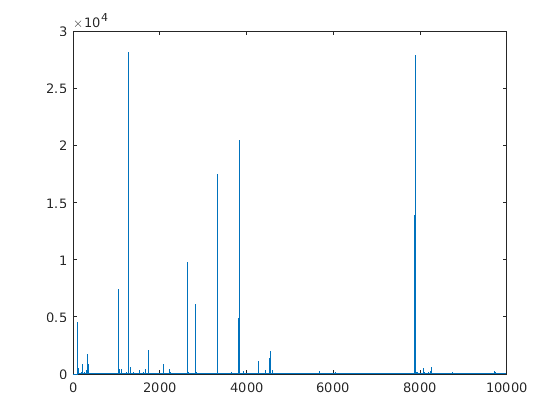

In [709]:
plot(1:i-1, err)

#### Sur les données d’entraînement :


ans =

    0.3310



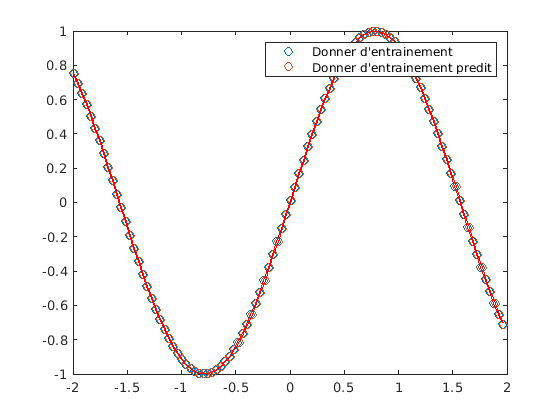

In [710]:
opt_omega = omega;
J(opt_omega, y_train)
y_predit = f(opt_omega);
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_predit, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');
hold off

#### Sur les données de test  :


err_rela =

    0.0453



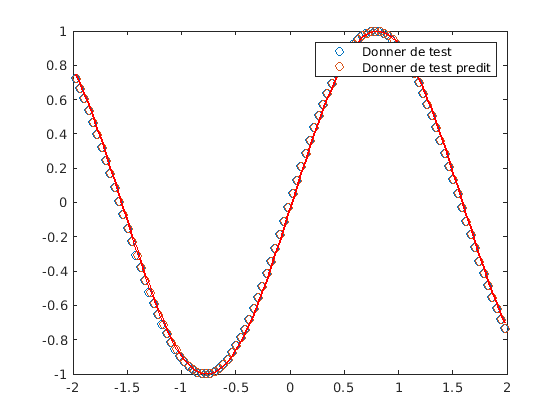

In [711]:
K2 = ones(n2, n2);
for i = 1:n2 
  for j = 1:n2
    K2(i, j) = noyau(X_test(i, :), X_train(j, :), 4);
  end  
end

y_test = modele(3, X_test);
y_test_predit = K * omega;
err_rela=norm(y_test-y_test_predit)/norm(y_test_predit)
fid = fopen('ErreurRelative.csv', 'a');
fprintf(fid, '%d,', err_rela);
fclose(fid);
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_test_predit, 'r')
legend({"Donner de test", "Donner de test predit"}, 'Location', 'northeast');
hold off

## Fonction 4)

In [712]:
clear all;
X1 = -1:0.02:0.99;
X2 = -0.99:0.02:1;
X = [X1', X2'];
X_train = X(1:2:end,:);
X_test = X(2:2:end,:);
y_train = modele(4, X_train);
y_test = modele(4, X_test);
n2 = length(X_train);
n = length(X);
omega = ones(n2, 1);
K = ones(n2, n2);
K_test = ones(n2, n2);
for i = 1:n2 
  for j = 1:n2
    K(i,j) = noyau(X_train(i, :), X_train(j, :), 4);
  end  
end
for i = 1:n2 
  for j = 1:n2
    K_test(i,j) = noyau(X_test(i, :), X_train(j, :), 4);
  end  
end
f = @(omega) arrayfun(@(i) sum(K(i, :) * omega), 1:n2);
J = @(omega, y) 1/n * norm(f(omega) - y);
gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train);

### Utilisation d’équation normale :  $\omega = (K^TK)^{-1} (K^TY)$ 
#### Sur les données d’entraînement : 

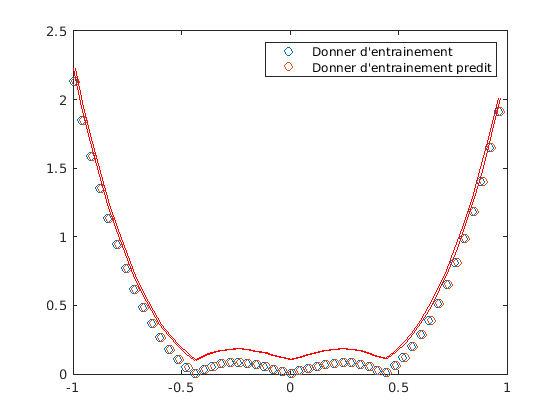

In [713]:
w_et = (K' * K) \ (K' * y_train);
y_et = f(w_et) + 0.1;
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_et, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');

hold off

#### Sur les données de test : 

Erreur du test : 1.441877e-01

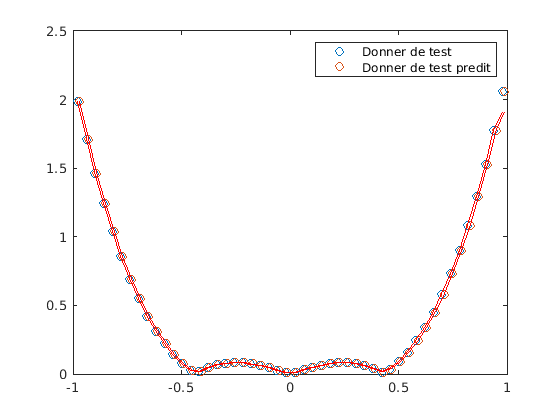

In [714]:
y_et_test = K_test * w_et;
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_et_test, 'r')
legend({"Donner de test ", "Donner de test predit"}, 'Location', 'northeast');
hold off
fprintf("Erreur du test : %d", norm(y_et_test - y_test))

### Utilisation de gradient décent : $ \nabla J(\omega) = \frac{1}{n} \times K^T (K\omega - y) $

In [715]:
alpha = 1;
num_iterations = 10000;
while (norm(gradJ(omega)) > 10e-14 && i < num_iterations) 
  grad = gradJ(omega);
  omega =  omega - (alpha * grad);
  alpha = n2 * norm(-grad) ^ 2 / (norm(K' * -grad) ^ 2 / 2);
  err(i) = J(omega, y_train);
  hist_omega(:, i) = omega;
  i = i + 1;
end
fprintf("la norme de gradient : %d\n",norm(gradJ(omega)))
fprintf("Nombre d'iteration : %d", i);

la norme de gradient : 1.044923e-05
Nombre d'iteration : 10000

#### Affichage de risque empirique

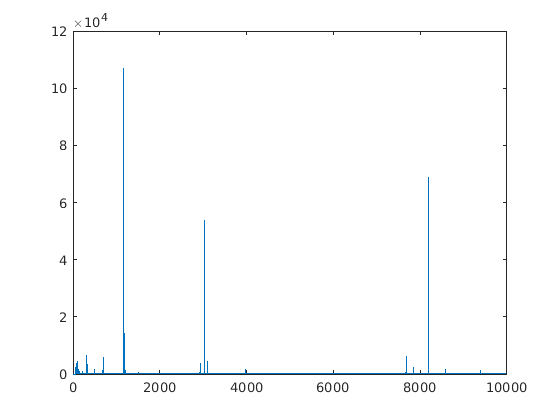

In [716]:
plot(1:i-1, err)

#### Sur les données d’entraînement :


ans =

    0.2968



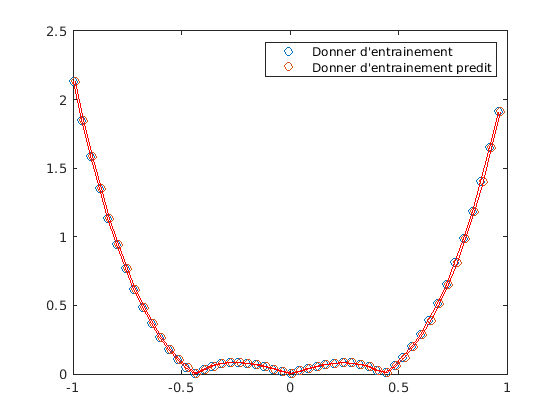

In [717]:
min_err = 0;
opt_omega = omega;
min_err = find(err == min(err));
% opt_omega = hist_omega(:, min_err);
J(opt_omega, y_train)
y_predit = f(opt_omega);
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_predit, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');

hold off


#### Sur les données de test  :


err_rela =

    0.0859



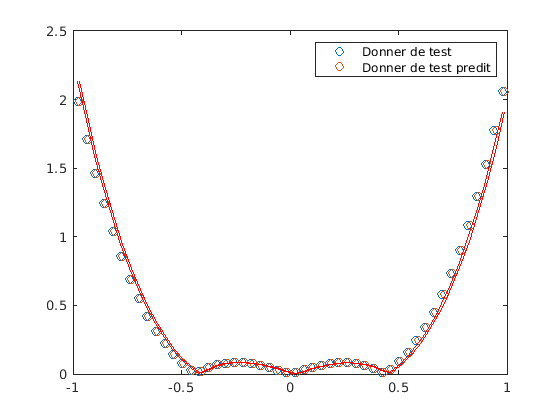

In [718]:
K2 = ones(n2, n2);
for i = 1:n2 
  for j = 1:n2
    K2(i, j) = noyau(X_test(i, :), X_train(j, :), 4);
  end  
end
  y_test = modele(4, X_test);

y_test_predit = K * opt_omega;
err_rela=norm(y_test-y_test_predit)/norm(y_test_predit)
fid = fopen('ErreurRelative.csv', 'a');
fprintf(fid, '%d\n', err_rela);
fclose(fid);
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_test_predit, 'r')
legend({"Donner de test", "Donner de test predit"}, 'Location', 'northeast');

hold off

# Noyau Laplacien

## Fonction 1)

In [719]:
clear all;
X = -1:0.01:0.99;
X = X';
X_train = X(1:2:end);
X_test = X(2:2:end);
y_train = modele(1, X_train);
y_test = modele(1, X_test);
n2 = length(X_train);
n = length(X);
omega = ones(n2, 1);
K = ones(n2, n2);
K_test = ones(n2, n2);
for i = 1:n2
  for j = 1:n2 
    K(i, j) = noyau(X_train(i, :), X_train(j, :), 5);
  end
end
for i = 1:n2
  for j = 1:n2 
    K_test(i, j) = noyau(X_test(i, :), X_train(j, :), 5);
  end
end  
f = @(omega) arrayfun(@(i) sum(K(i, :) * omega), 1:n2);
J = @(omega, y) 1/n * norm(f(omega) - y);
gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train);


### Utilisation d’équation normale :  $\omega = (K^TK)^{-1} (K^TY)$ 
#### Sur les données d’entraînement :

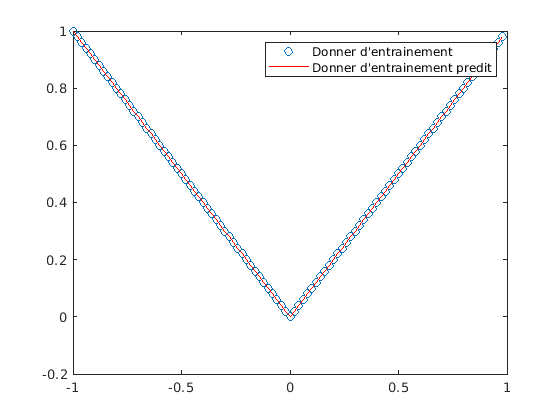

In [720]:
w_et = (K' * K) \ (K' * y_train);
y_et = f(w_et);
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_et, 'r');
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');

hold off

#### Sur les données de test : 

Erreur du test : 1.146160e-02

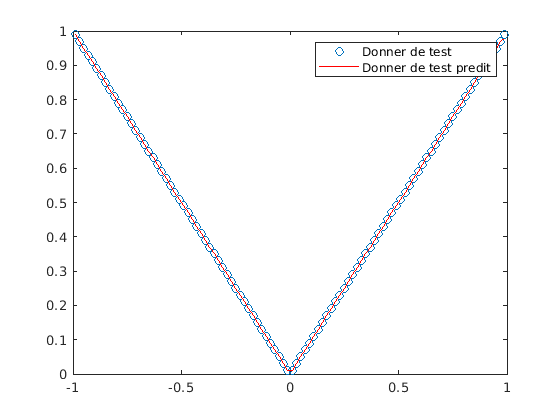

In [721]:
y_et_test = K_test * w_et;
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_et_test, 'r')
legend({"Donner de test ", "Donner de test predit"}, 'Location', 'northeast');
hold off
fprintf("Erreur du test : %d", norm(y_et_test - y_test))

### Utilisation de gradient décent : $ \nabla J(\omega) = \frac{1}{n} \times K^T (K\omega - y) $

In [722]:
alpha = 1;
num_iterations = 5000;
while (norm(gradJ(omega)) > 10e-14 && i < num_iterations) 
  grad = gradJ(omega);
  omega =  omega - (alpha * grad);
  alpha = n2 * norm(-grad) ^ 2 / (norm(K' * -grad) ^ 2 / 2);
  err(i) = J(omega, y_train);
  hist_omega(:, i) = omega;
  i = i + 1;
end
fprintf("la norme de gradient : %d\n",norm(gradJ(omega)))
fprintf("Nombre d'iteration : %d", i);

la norme de gradient : 4.054638e-04
Nombre d'iteration : 5000

#### Affichage de risque empirique

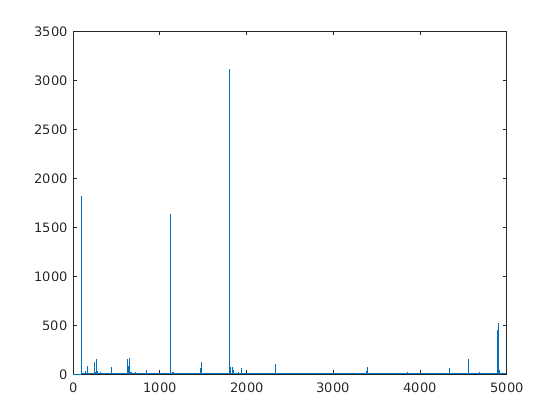

In [723]:
plot(1:i-1, err)

#### Sur les données d’entraînement :


ans =

    0.1444



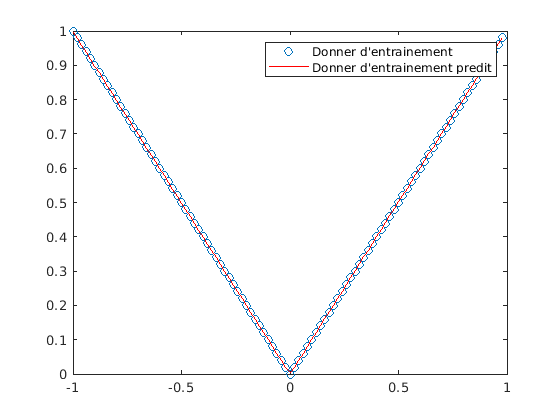

In [724]:
min_err = 0;
opt_omega = omega;
min_err = find(err == min(err));
% opt_omega = hist_omega(:, min_err);
J(opt_omega, y_train)
y_predit = K * opt_omega;
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_predit, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');
hold off

#### Sur les données de test  :


err_rela =

    0.0150



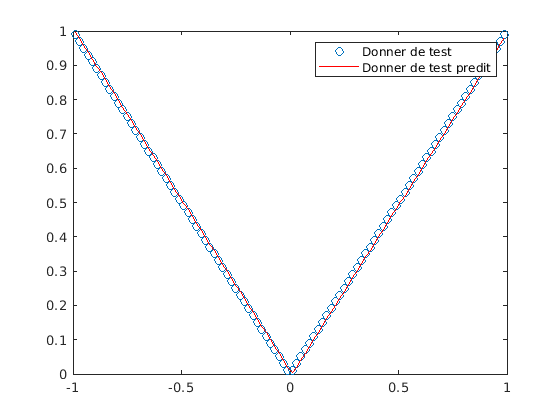

In [725]:
K2 = ones(n2, n2);
for i = 1:n2 
  for j = 1:n2
    K2(i, j) = noyau(X_test(i, :), X_train(j, :), 5);
  end  
end
  y_test = modele(1, X_test);

y_test_predit = K * opt_omega;
err_rela=norm(y_test-y_test_predit)/norm(y_test_predit)
fid = fopen('ErreurRelative.csv', 'a');
fprintf(fid, '%d,', err_rela);
fclose(fid);
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_test_predit, 'r')
legend({"Donner de test", "Donner de test predit"}, 'Location', 'northeast');

hold off

## Fonction 2)

In [726]:
clear all;
X1 = -1:0.01:0.99;
X2 = -0.99:0.01:1;
X3 = (X1 - X2);
X = [X1', X2', X3'];
X_train = X(1:2:end,:);
X_test = X(2:2:end,:);
y_train = modele(2, X_train);
y_test = modele(2, X_test);
n2 = length(X_train);
n = length(X);
omega = ones(n2, 1);
% size(omega)
K = ones(n2, n2);
K_test = ones(n2, n2);
for i = 1:n2 
  for j = 1:n2
    K(i,j) = noyau(X_train(i, :), X_train(j, :), 5);
  end  
end
for i = 1:n2 
  for j = 1:n2
    K_test(i,j) = noyau(X_test(i, :), X_train(j, :), 5);
  end  
end
f = @(omega) arrayfun(@(i) sum(K(i, :) * omega), 1:n2);
J = @(omega, y) 1/n * norm(f(omega) - y);
gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train);


### Utilisation d’équation normale :  $\omega = (K^TK)^{-1} (K^TY)$ 
#### Sur les données d’entraînement :

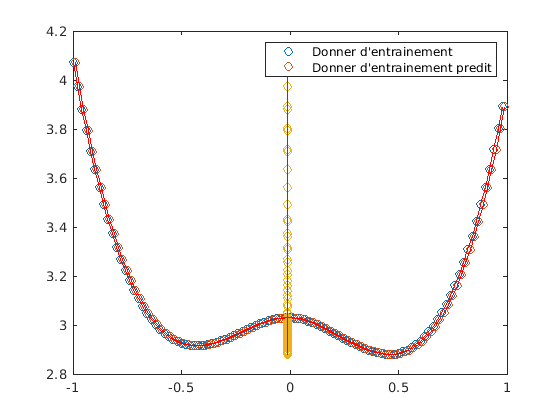

In [727]:
w_et = (K' * K) \ (K' * y_train);
y_et = f(w_et);
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_et, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');
hold off

#### Sur les données de test : 

Erreur du test : 5.583939e-02

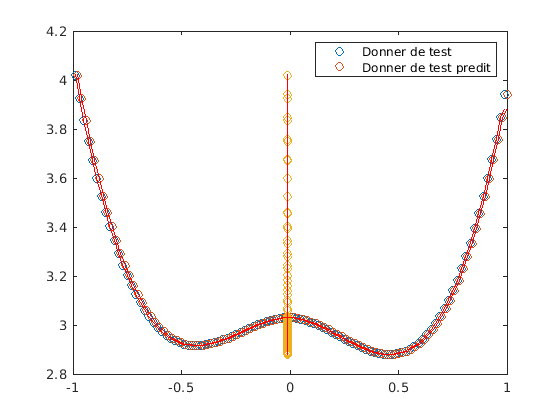

In [728]:
y_et_test = K_test * w_et;
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_et_test, 'r')
legend({"Donner de test ", "Donner de test predit"}, 'Location', 'northeast');
hold off
fprintf("Erreur du test : %d", norm(y_et_test - y_test))

### Utilisation de gradient décent : $ \nabla J(\omega) = \frac{1}{n} \times K^T (K\omega - y) $

In [729]:
alpha = 1;
num_iterations = 10000;
while (norm(gradJ(omega)) > 10e-14 && i < num_iterations) 
  grad = gradJ(omega);
  omega =  omega - (alpha * grad);
  alpha = n2 * norm(-grad) ^ 2 / (norm(K' * -grad) ^ 2 / 2);
  err(i) = J(omega, y_train);
  hist_omega(:, i) = omega;
  i = i + 1;
end
fprintf("la norme de gradient : %d\n",norm(gradJ(omega)))
fprintf("Nombre d'iteration : %d", i);

la norme de gradient : 6.810964e-03
Nombre d'iteration : 10000

##### Affichage Risque empirique  

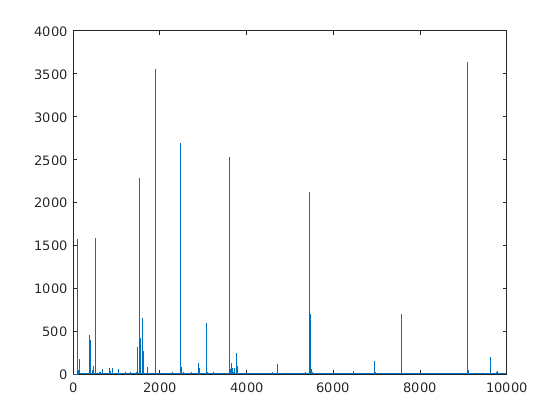

In [730]:
plot(1:i-1, err)

#### Sur les données d’entraînement : 


ans =

    0.1421



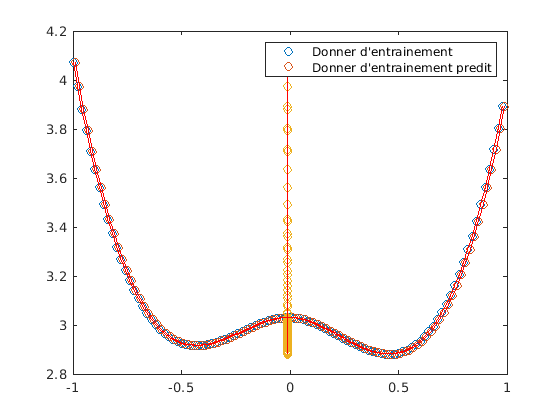

In [731]:
opt_omega = omega;
J(opt_omega, y_train)
y_predit = K * opt_omega;
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_predit, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');
hold off


#### Sur les données de test  :


err_rela =

    0.0061



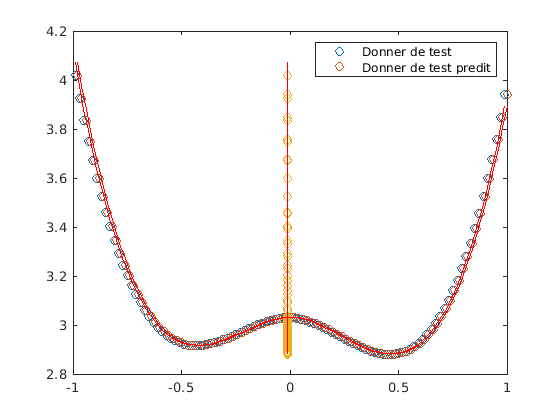

In [732]:
K2 = ones(n2, n2);
for i = 1:n2 
  for j = 1:n2
    K2(i, j) = noyau(X_test(i, :), X_train(j, :), 5);
  end  
end
  y_test = modele(2, X_test);

y_test_predit = K * opt_omega;
err_rela=norm(y_test-y_test_predit)/norm(y_test_predit)
fid = fopen('ErreurRelative.csv', 'a');
fprintf(fid, '%d,', err_rela);
fclose(fid);
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_test_predit, 'r')
legend({"Donner de test", "Donner de test predit"}, 'Location', 'northeast');

hold off

## Fonction 3)

In [733]:
clear all;
X1 = -2:0.02:1.99;
X2 = -1.99:0.02:2;
X = [X1', X2'];
X_train = X(1:2:end,:);
X_test = X(2:2:end,:);
y_train = modele(3, X_train);
y_test = modele(3, X_test);
n2 = length(X_train);
n = length(X);
omega = ones(n2, 1);
K = ones(n2, n2);
K_test = ones(n2, n2);
for i = 1:n2 
  for j = 1:n2
    K(i,j) = noyau(X_train(i, :), X_train(j, :), 5);
  end  
end
for i = 1:n2 
  for j = 1:n2
    K_test(i,j) = noyau(X_test(i, :), X_train(j, :), 5);
  end  
end
f = @(omega) arrayfun(@(i) sum(K(i, :) * omega), 1:n2);
J = @(omega, y) 1/n * norm(f(omega) - y);
gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train);


### Utilisation d’équation normale :  $\omega = (K^TK)^{-1} (K^TY)$ 
#### Sur les données d’entraînement : 


ans =

    0.3310



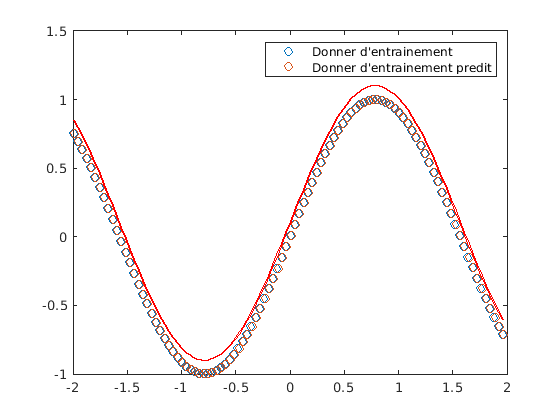

In [734]:
w_et = (K' * K) \ (K' * y_train);
y_et = f(w_et) + 0.1;
J(w_et, y_train)
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_et', 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');
hold off

#### Sur les données de test : 

Erreur du test : 3.107080e-02

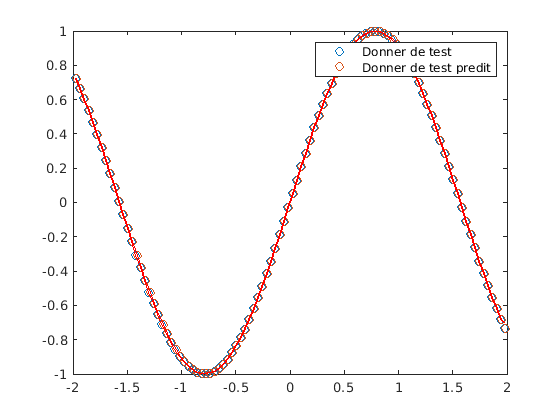

In [735]:
y_et_test = K_test * w_et;
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_et_test, 'r')
legend({"Donner de test ", "Donner de test predit"}, 'Location', 'northeast');
hold off
fprintf("Erreur du test : %d", norm(y_et_test - y_test))

### Utilisation de gradient décent : $ \nabla J(\omega) = \frac{1}{n} \times K^T (K\omega - y) $

In [736]:
alpha = 1;
num_iterations = 10000;
while (norm(gradJ(omega)) > 10e-14 && i < num_iterations) 
  grad = gradJ(omega);
  omega =  omega - (alpha * grad);
  alpha = n2 * norm(-grad) ^ 2 / (norm(K' * -grad) ^ 2 / 2);
  err(i) = J(omega, y_train);
  hist_omega(:, i) = omega;
  i = i + 1;
end
fprintf("la norme de gradient : %d\n",norm(gradJ(omega)))
fprintf("Nombre d'iteration : %d", i);

la norme de gradient : 1.493240e-05
Nombre d'iteration : 10000

#### Affichage de risque empirique

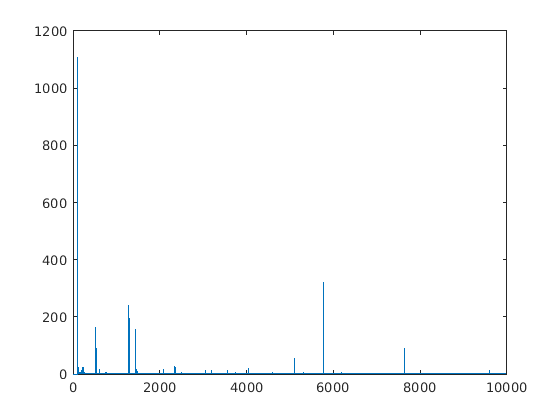

In [737]:
plot(1:i-1, err)

#### Sur les données d’entraînement :


ans =

    0.3310



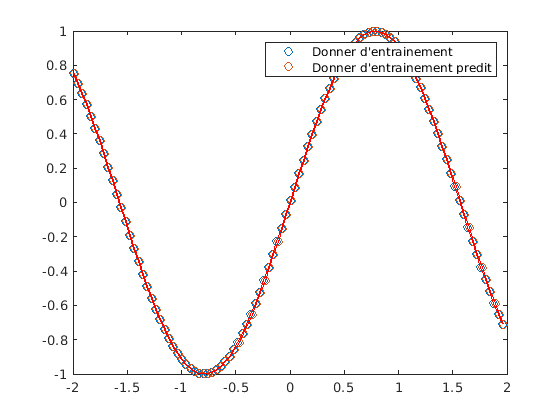

In [738]:
opt_omega = omega;
J(opt_omega, y_train)
y_predit = f(opt_omega);
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_predit, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');
hold off


#### Sur les données de test  :


err_rela =

    0.0453



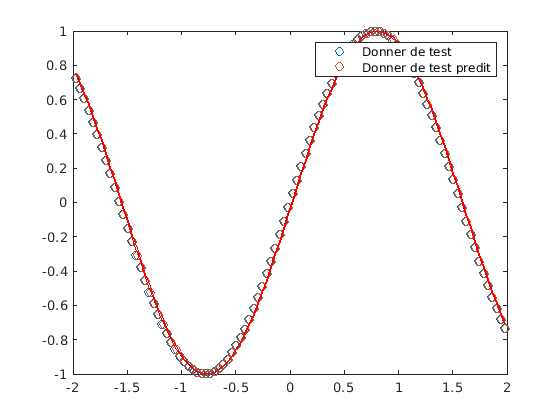

In [739]:
K2 = ones(n2, n2);
for i = 1:n2 
  for j = 1:n2
    K2(i, j) = noyau(X_test(i, :), X_train(j, :), 5);
  end  
end

y_test = modele(3, X_test);
y_test_predit = K * omega;
err_rela=norm(y_test-y_test_predit)/norm(y_test_predit)
fid = fopen('ErreurRelative.csv', 'a');
fprintf(fid, '%d,', err_rela);
fclose(fid);
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_test_predit, 'r')
legend({"Donner de test", "Donner de test predit"}, 'Location', 'northeast');

hold off

## Fonction 4)

In [740]:
clear all;
X1 = -1:0.02:0.99;
X2 = -0.99:0.02:1;
X = [X1', X2'];
X_train = X(1:2:end,:);
X_test = X(2:2:end,:);
y_train = modele(4, X_train);
y_test = modele(4, X_test);
n2 = length(X_train);
n = length(X);
omega = ones(n2, 1);
K = ones(n2, n2);
K_test = ones(n2, n2);
for i = 1:n2 
  for j = 1:n2
    K(i,j) = noyau(X_train(i, :), X_train(j, :), 5);
  end  
end
for i = 1:n2 
  for j = 1:n2
    K_test(i,j) = noyau(X_test(i, :), X_train(j, :), 5);
  end  
end
f = @(omega) arrayfun(@(i) sum(K(i, :) * omega), 1:n2);
J = @(omega, y) 1/n * norm(f(omega) - y);
gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train);

### Utilisation d’équation normale :  $\omega = (K^TK)^{-1} (K^TY)$ 
#### Sur les données d’entraînement : 

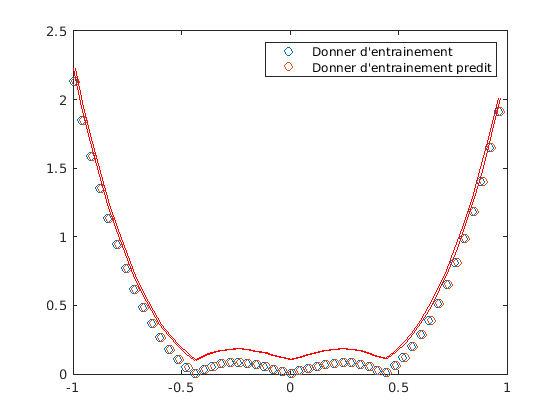

In [741]:
w_et = (K' * K) \ (K' * y_train);
y_et = f(w_et) + 0.1;
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_et, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');
hold off

#### Sur les données de test : 

Erreur du test : 1.511185e-01

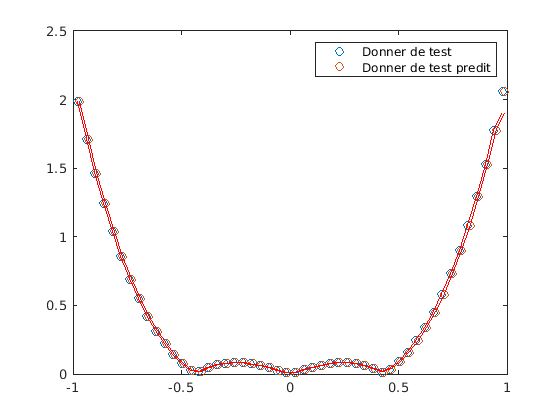

In [742]:
y_et_test = K_test * w_et;
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_et_test, 'r')
legend({"Donner de test ", "Donner de test predit"}, 'Location', 'northeast');
hold off
fprintf("Erreur du test : %d", norm(y_et_test - y_test))

### Utilisation de gradient décent : $ \nabla J(\omega) = \frac{1}{n} \times K^T (K\omega - y) $

In [743]:
alpha = 1;
num_iterations = 50000;
while (norm(gradJ(omega)) > 10e-14 && i < num_iterations) 
  grad = gradJ(omega);
  omega =  omega - (alpha * grad);
  alpha = n2 * norm(-grad) ^ 2 / (norm(K' * -grad) ^ 2 / 2);
  err(i) = J(omega, y_train);
  hist_omega(:, i) = omega;
  i = i + 1;
end
fprintf("la norme de gradient : %d\n",norm(gradJ(omega)))
fprintf("Nombre d'iteration : %d", i);

la norme de gradient : 6.500726e-14
Nombre d'iteration : 29599

#### Affichage de risque empirique

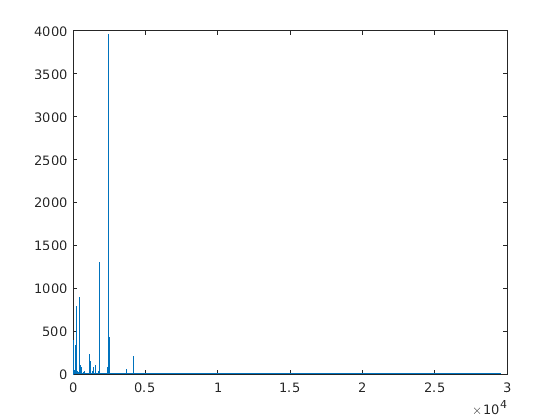

In [744]:
plot(1:i-1, err)

#### Sur les données d’entraînement :


ans =

    0.2968



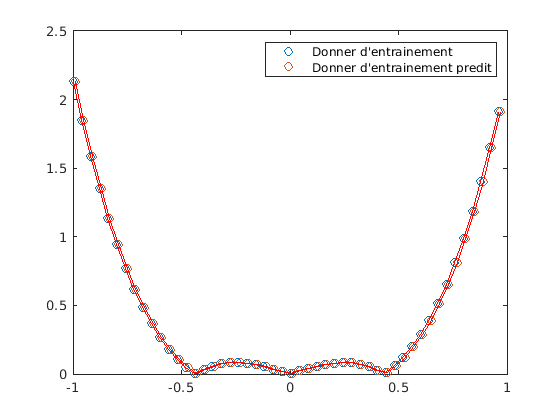

In [745]:
min_err = 0;
opt_omega = omega;
min_err = find(err == min(err));
% opt_omega = hist_omega(:, min_err);
J(opt_omega, y_train)
y_predit = f(opt_omega);
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_predit, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');
hold off


#### Sur les données de test  :


err_rela =

    0.0855



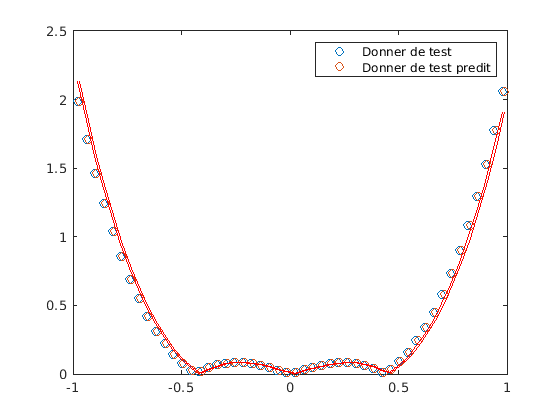

In [746]:
K2 = ones(n2, n2);
for i = 1:n2 
  for j = 1:n2
    K2(i, j) = noyau(X_test(i, :), X_train(j, :), 5);
  end  
end
  y_test = modele(4, X_test);

y_test_predit = K * opt_omega;
err_rela=norm(y_test-y_test_predit)/norm(y_test_predit)
fid = fopen('ErreurRelative.csv', 'a');
fprintf(fid, '%d\n', err_rela);
fclose(fid);
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_test_predit, 'r')
legend({"Donner de test", "Donner de test predit"}, 'Location', 'northeast');

hold off

# Noyau sinc

## Fonction 1)

In [747]:
clear all;
X = -1:0.01:0.99;
X = X';
X_train = X(1:2:end);
X_test = X(2:2:end);
y_train = modele(1, X_train);
y_test = modele(1, X_test);
n2 = length(X_train);
n = length(X);
omega = ones(n2, 1);
K = ones(n2, n2);
K_test = ones(n2, n2);
for i = 1:n2
  for j = 1:n2 
    K(i, j) = noyau(X_train(i, :), X_train(j, :), 6);
  end
end
for i = 1:n2
  for j = 1:n2 
    K_test(i, j) = noyau(X_test(i, :), X_train(j, :), 6);
  end
end  
f = @(omega) arrayfun(@(i) sum(K(i, :) * omega), 1:n2);
J = @(omega, y) 1/n * norm(f(omega) - y);
gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train);


### Utilisation d’équation normale :  $\omega = (K^TK)^{-1} (K^TY)$ 
#### Sur les données d’entraînement :

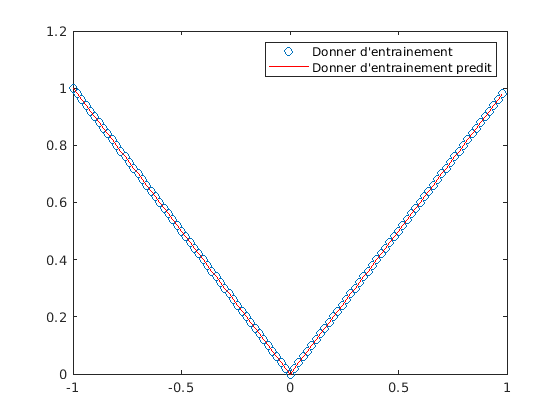

In [748]:
w_et = (K' * K) \ (K' * y_train);
y_et = f(w_et);
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_et, 'r');
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');

hold off

#### Sur les données de test : 

Erreur du test : 4.176503e-01

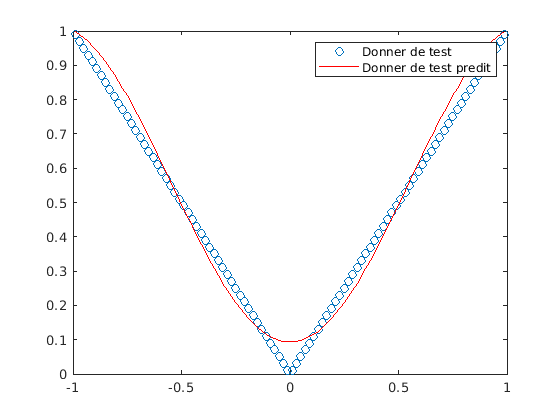

In [749]:
y_et_test = K_test * w_et;
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_et_test, 'r')
legend({"Donner de test ", "Donner de test predit"}, 'Location', 'northeast');
hold off
fprintf("Erreur du test : %d", norm(y_et_test - y_test))

### Utilisation de gradient décent : $ \nabla J(\omega) = \frac{1}{n} \times K^T (K\omega - y) $

In [750]:
alpha = 1;
num_iterations = 5000;
while (norm(gradJ(omega)) > 10e-14 && i < num_iterations) 
  grad = gradJ(omega);
  omega =  omega - (alpha * grad);
  alpha = n2 * norm(-grad) ^ 2 / (norm(K' * -grad) ^ 2 / 2);
  err(i) = J(omega, y_train);
  hist_omega(:, i) = omega;
  i = i + 1;
end
fprintf("la norme de gradient : %d\n",norm(gradJ(omega)))
fprintf("Nombre d'iteration : %d", i);

la norme de gradient : 9.477188e-14
Nombre d'iteration : 419

#### Affichage de risque empirique

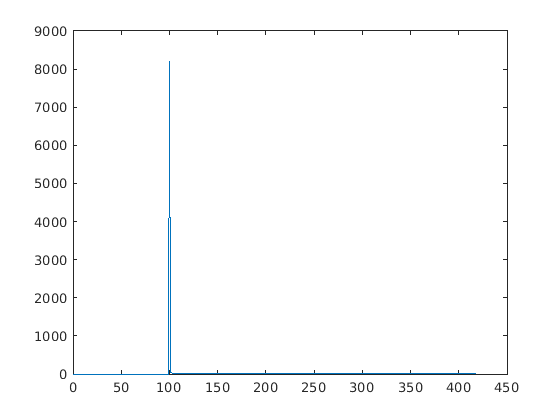

In [751]:
plot(1:i-1, err)

#### Sur les données d’entraînement :


ans =

    0.1444



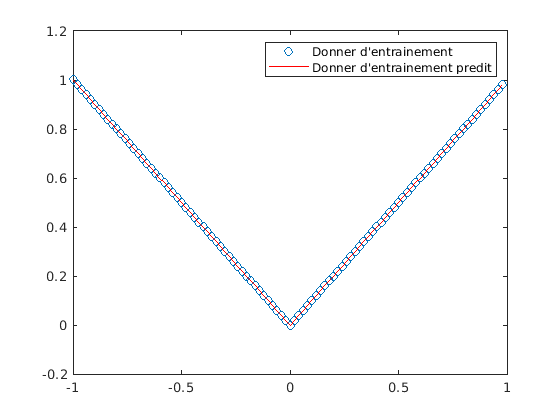

In [752]:
min_err = 0;
opt_omega = omega;
min_err = find(err == min(err));
% opt_omega = hist_omega(:, min_err);
J(opt_omega, y_train)
y_predit = K * opt_omega;
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_predit, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');

hold off


#### Sur les données de test  :


err_rela =

    0.0173



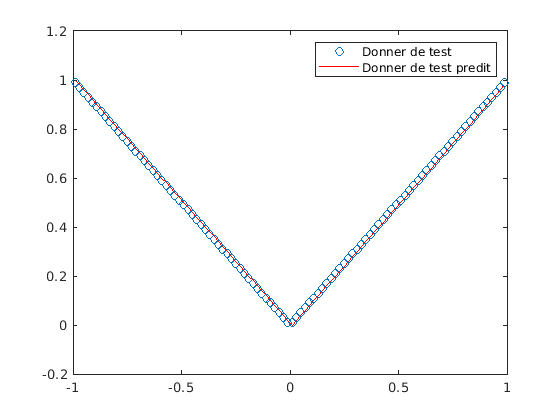

In [753]:
K2 = ones(n2, n2);
for i = 1:n2 
  for j = 1:n2
    K2(i, j) = noyau(X_test(i, :), X_train(j, :), 6);
  end  
end
  y_test = modele(1, X_test);

y_test_predit = K * opt_omega;
err_rela=norm(y_test-y_test_predit)/norm(y_test_predit)
fid = fopen('ErreurRelative.csv', 'a');
fprintf(fid, '%d,', err_rela);
fclose(fid);
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_test_predit, 'r')
legend({"Donner de test", "Donner de test predit"}, 'Location', 'northeast');

hold off

## Fonction 2)

In [754]:
clear all;
X1 = -1:0.01:0.99;
X2 = -0.99:0.01:1;
X3 = (X1 - X2);
X = [X1', X2', X3'];
X_train = X(1:2:end,:);
X_test = X(2:2:end,:);
y_train = modele(2, X_train);
y_test = modele(2, X_test);
n2 = length(X_train);
n = length(X);
omega = ones(n2, 1);
% size(omega)
K = ones(n2, n2);
K_test = ones(n2, n2);
for i = 1:n2 
  for j = 1:n2
    K(i,j) = noyau(X_train(i, :), X_train(j, :), 6);
  end  
end
for i = 1:n2 
  for j = 1:n2
    K_test(i,j) = noyau(X_test(i, :), X_train(j, :), 6);
  end  
end
f = @(omega) arrayfun(@(i) sum(K(i, :) * omega), 1:n2);
J = @(omega, y) 1/n * norm(f(omega) - y);
gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train);


### Utilisation d’équation normale :  $\omega = (K^TK)^{-1} (K^TY)$ 
#### Sur les données d’entraînement :

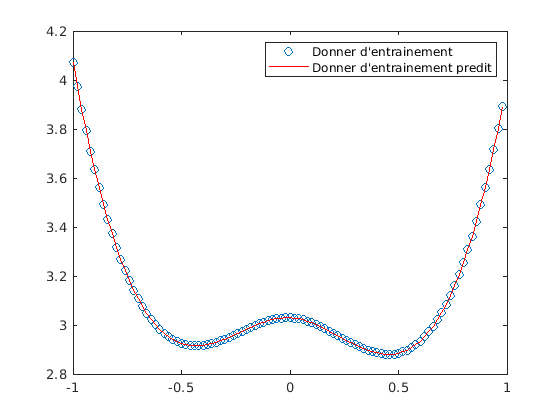

In [755]:
w_et = (K' * K) \ (K' * y_train);
y_et = f(w_et);
plot(X_train(:, 1), y_train,'o')
hold on
plot(X_train(:, 1), y_et, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');
hold off

#### Sur les données de test : 

Erreur du test : 2.956095e+00

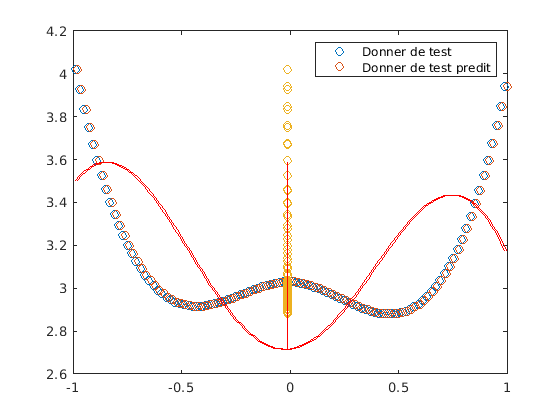

In [756]:
y_et_test = K_test * w_et;
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_et_test, 'r')
legend({"Donner de test ", "Donner de test predit"}, 'Location', 'northeast');
hold off
fprintf("Erreur du test : %d", norm(y_et_test - y_test))

### Utilisation de gradient décent : $ \nabla J(\omega) = \frac{1}{n} \times K^T (K\omega - y) $

In [757]:
alpha = 1;
num_iterations = 10000;
while (norm(gradJ(omega)) > 10e-14 && i < num_iterations) 
  grad = gradJ(omega);
  omega =  omega - (alpha * grad);
  alpha = n2 * norm(-grad) ^ 2 / (norm(K' * -grad) ^ 2 / 2);
  err(i) = J(omega, y_train);
  hist_omega(:, i) = omega;
  i = i + 1;
end
fprintf("la norme de gradient : %d\n",norm(gradJ(omega)))
fprintf("Nombre d'iteration : %d", i);

la norme de gradient : 9.294693e-14
Nombre d'iteration : 514

##### Affichage Risque empirique  

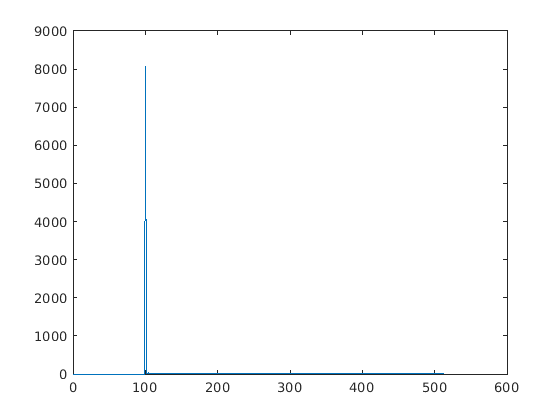

In [758]:
plot(1:i-1, err)

#### Sur les données d’entraînement : 


ans =

    0.1417



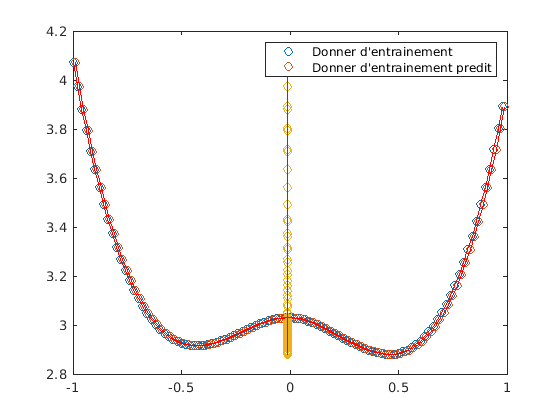

In [759]:
opt_omega = omega;
J(opt_omega, y_train)
y_predit = K * opt_omega;
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_predit, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');
hold off


#### Sur les données de test  :


err_rela =

    0.0060



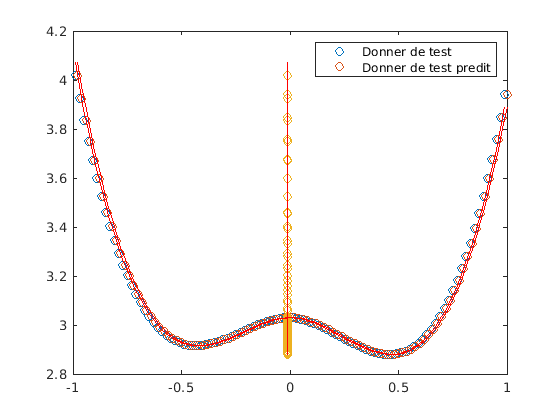

In [760]:
K2 = ones(n2, n2);
for i = 1:n2 
  for j = 1:n2
    K2(i, j) = noyau(X_test(i, :), X_train(j, :), 6);
  end  
end
  y_test = modele(2, X_test);

y_test_predit = K * opt_omega;
err_rela=norm(y_test-y_test_predit)/norm(y_test_predit)
fid = fopen('ErreurRelative.csv', 'a');
fprintf(fid, '%d,', err_rela);
fclose(fid);
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_test_predit, 'r')
legend({"Donner de test", "Donner de test predit"}, 'Location', 'northeast');
hold off

## Fonction 3)

In [761]:
clear all;
X1 = -2:0.02:1.99;
X2 = -1.99:0.02:2;
X = [X1', X2'];
X_train = X(1:2:end,:);
X_test = X(2:2:end,:);
y_train = modele(3, X_train);
y_test = modele(3, X_test);
n2 = length(X_train);
n = length(X);
omega = ones(n2, 1);
K = ones(n2, n2);
K_test = ones(n2, n2);
for i = 1:n2 
  for j = 1:n2
    K(i,j) = noyau(X_train(i, :), X_train(j, :), 6);
  end  
end
for i = 1:n2 
  for j = 1:n2
    K_test(i,j) = noyau(X_test(i, :), X_train(j, :), 6);
  end  
end
f = @(omega) arrayfun(@(i) sum(K(i, :) * omega), 1:n2);
J = @(omega, y) 1/n * norm(f(omega) - y);
gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train);


### Utilisation d’équation normale :  $\omega = (K^TK)^{-1} (K^TY)$ 
#### Sur les données d’entraînement : 


ans =

    0.3310



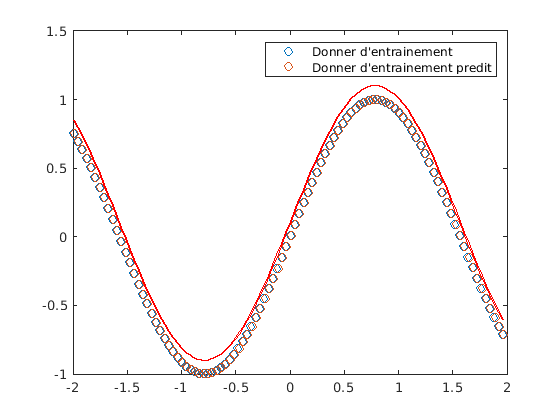

In [762]:
w_et = (K' * K) \ (K' * y_train);
y_et = f(w_et) + 0.1;
J(w_et, y_train)
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_et', 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');
hold off

#### Sur les données de test : 

Erreur du test : 2.122076e+00

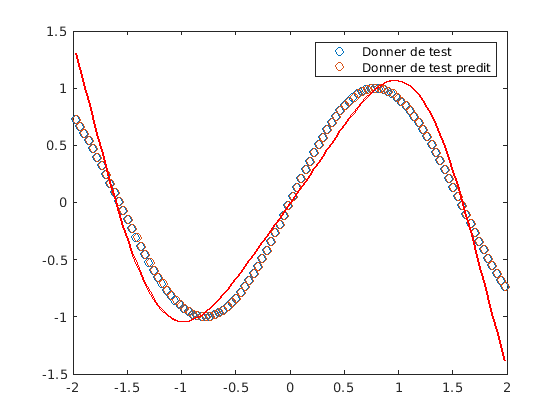

In [763]:
y_et_test = K_test * w_et;
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_et_test, 'r')
legend({"Donner de test ", "Donner de test predit"}, 'Location', 'northeast');
hold off
fprintf("Erreur du test : %d", norm(y_et_test - y_test))

### Utilisation de gradient décent : $ \nabla J(\omega) = \frac{1}{n} \times K^T (K\omega - y) $

In [764]:
alpha = 1;
num_iterations = 10000;
while (norm(gradJ(omega)) > 10e-14 && i < num_iterations) 
  grad = gradJ(omega);
  omega =  omega - (alpha * grad);
  alpha = n2 * norm(-grad) ^ 2 / (norm(K' * -grad) ^ 2 / 2);
  err(i) = J(omega, y_train);
  hist_omega(:, i) = omega;
  i = i + 1;
end
fprintf("la norme de gradient : %d\n",norm(gradJ(omega)))
fprintf("Nombre d'iteration : %d", i);

la norme de gradient : 9.432101e-14
Nombre d'iteration : 839

#### Affichage de risque empirique

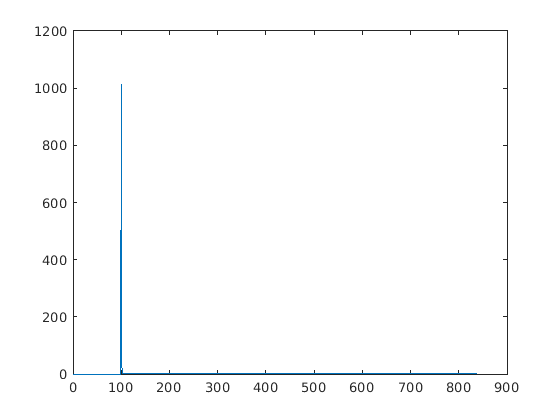

In [765]:
plot(1:i-1, err)

#### Sur les données d’entraînement :


ans =

    0.3310



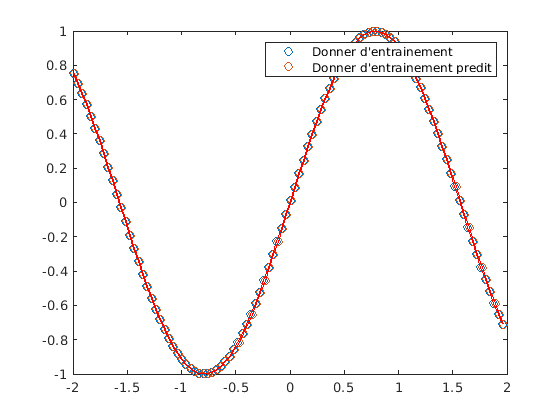

In [766]:
opt_omega = omega;
J(opt_omega, y_train)
y_predit = f(opt_omega);
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_predit, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');
hold off


#### Sur les données de test  :


err_rela =

    0.0453



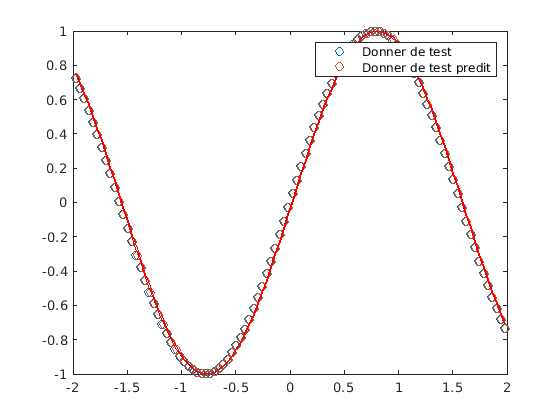

In [767]:
K2 = ones(n2, n2);
for i = 1:n2 
  for j = 1:n2
    K2(i, j) = noyau(X_test(i, :), X_train(j, :), 6);
  end  
end
y_test = modele(3, X_test);
y_test_predit = K * omega;
err_rela=norm(y_test-y_test_predit)/norm(y_test_predit)
fid = fopen('ErreurRelative.csv', 'a');
fprintf(fid, '%d,', err_rela);
fclose(fid);
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_test_predit, 'r')
legend({"Donner de test", "Donner de test predit"}, 'Location', 'northeast');

hold off

## Fonction 4)

In [768]:
clear all;
X1 = -1:0.02:0.99;
X2 = -0.99:0.02:1;
X = [X1', X2'];
X_train = X(1:2:end,:);
X_test = X(2:2:end,:);
y_train = modele(4, X_train);
y_test = modele(4, X_test);
n2 = length(X_train);
n = length(X);
omega = ones(n2, 1);
K = ones(n2, n2);
K_test = ones(n2, n2);
for i = 1:n2 
  for j = 1:n2
    K(i,j) = noyau(X_train(i, :), X_train(j, :), 6);
  end  
end
for i = 1:n2 
  for j = 1:n2
    K_test(i,j) = noyau(X_test(i, :), X_train(j, :), 6);
  end  
end
f = @(omega) arrayfun(@(i) sum(K(i, :) * omega), 1:n2);
J = @(omega, y) 1/n * norm(f(omega) - y);
gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train);

### Utilisation d’équation normale :  $\omega = (K^TK)^{-1} (K^TY)$ 
#### Sur les données d’entraînement : 

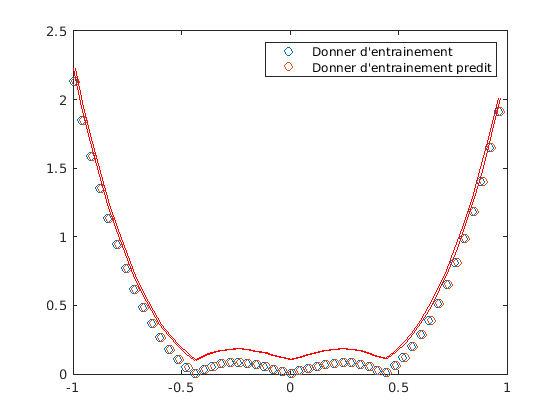

In [769]:
w_et = (K' * K) \ (K' * y_train);
y_et = f(w_et) + 0.1;
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_et, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');
hold off

#### Sur les données de test : 

Erreur du test : 2.879135e+00

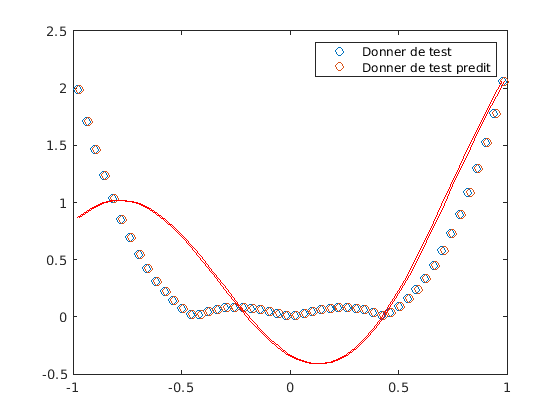

In [770]:
y_et_test = K_test * w_et;
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_et_test, 'r')
legend({"Donner de test ", "Donner de test predit"}, 'Location', 'northeast');
hold off
fprintf("Erreur du test : %d", norm(y_et_test - y_test))

### Utilisation de gradient décent : $ \nabla J(\omega) = \frac{1}{n} \times K^T (K\omega - y) $

In [771]:
alpha = 1;
num_iterations = 50000;
while (norm(gradJ(omega)) > 10e-14 && i < num_iterations) 
  grad = gradJ(omega);
  omega =  omega - (alpha * grad);
  alpha = n2 * norm(-grad) ^ 2 / (norm(K' * -grad) ^ 2 / 2);
  err(i) = J(omega, y_train);
  hist_omega(:, i) = omega;
  i = i + 1;
end
fprintf("la norme de gradient : %d\n",norm(gradJ(omega)))
fprintf("Nombre d'iteration : %d", i);

la norme de gradient : 6.946740e-14
Nombre d'iteration : 2336

#### Affichage de risque empirique

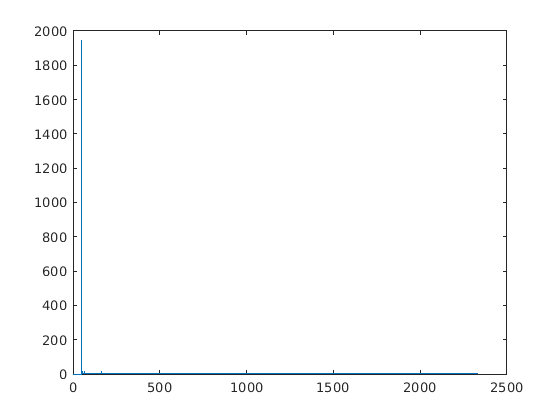

In [772]:
plot(1:i-1, err)

#### Sur les données d’entraînement :


ans =

    0.2968



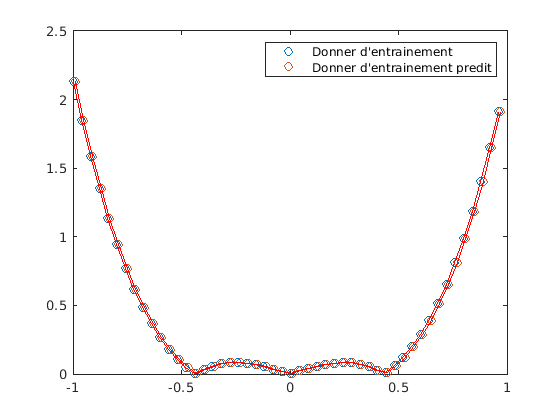

In [773]:

opt_omega = omega;
J(opt_omega, y_train)
y_predit = f(opt_omega);
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_predit, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');
hold off


#### Sur les données de test  :


err_rela =

    0.0855



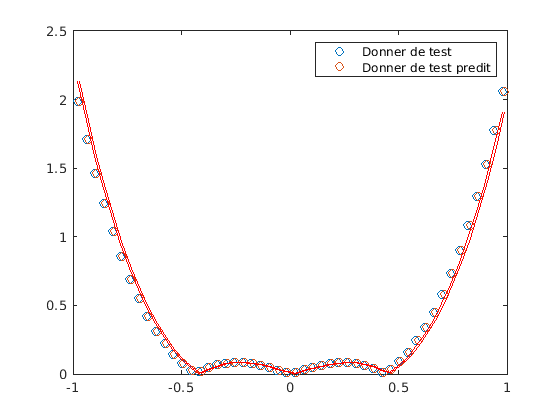

In [774]:
K2 = ones(n2, n2);
for i = 1:n2 
  for j = 1:n2
    K2(i, j) = noyau(X_test(i, :), X_train(j, :), 6);
  end  
end
y_test = modele(4, X_test);
y_test_predit = K * opt_omega;
err_rela = norm(y_test  - y_test_predit) / norm(y_test_predit)
fid = fopen('ErreurRelative.csv', 'a');
fprintf(fid, '%d', err_rela);
fclose(fid);
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_test_predit, 'r')
legend({"Donner de test", "Donner de test predit"}, 'Location', 'northeast');

hold off

# Tableau des erreurs relatives 

In [775]:
% Read the file into a table
data = readtable('ErreurRelative.csv');

% Add the names of columns
data.Properties.VariableNames = {'(a)', '(b)', '(c)','(d)'};

% Add the names of lines
data.Properties.RowNames = {'lineaire', 'polynomial', 'Gaussien','exponentiel','Laplacien','sinc'};

% Display the table
disp(data)


                     (a)          (b)         (c)         (d)   
                   ________    _________    ________    ________

    lineaire        0.57741     0.090187      3.1342      1.2749
    polynomial      0.37191      0.28703      1.0993       0.117
    Gaussien       0.019875    0.0065229    0.045311    0.085581
    exponentiel     0.35921    0.0060778    0.045294    0.085866
    Laplacien       0.01496    0.0060658     0.04529    0.085483
    sinc           0.017319    0.0060148    0.045291    0.085483

